## **Customer Lifetime Value Prediction**
---

In [71]:
from IPython.display import Image, display

image_url = 'https://media.licdn.com/dms/image/D4D12AQETJHTF5O2AXw/article-cover_image-shrink_720_1280/0/1679295042515?e=2147483647&v=beta&t=n5gg1S2qNUtr4US_7U3aKF_m8fNX06CMwbcHJ9d4bz0'

# Display the image
display(Image(url=image_url))


In [ ]:
from IPython.display import Image
img = 'Black And White Modern Car Sale Banner.png'
Image(url=img)

## **Business Problem Understanding**

**Context**

Customer Lifetime Value (CLV) in Car Insurance

Context: Customer Lifetime Value (CLV) is the total amount of money a customer spends on a company throughout their relationship. Simply put, CLV is a prediction of the total revenue that can be obtained from a customer. Understanding and increasing CLV can increase a company's profits, help plan budgets, and analyze customer satisfaction. In practice, the CLV metric is widely used by companies that make repeat sales to customers (e.g., food, household products) and companies that use a subscription system in their business (e.g., insurance, telecommunications companies).

Benefits of CLV: 
- Helps companies determine how much to invest in customer acquisition and retention.
- Develop strategies to improve customer satisfaction and CLV.
- Predict future revenue and plan budgets.

Other factors:
- The value of claims paid to customers.
- Additional revenue from selling additional products.

**Problem Statement**

In this project, there is an example from car insurance company in Indonesia, PT Asuransi Mobil Sejahtera, which is experiencing problems in increasing the company's revenue. One of the causes of the problem is the inappropriate marketing strategy approach, where the company spends the same budget for all types of customers. As a result, PT Asuransi Mobil Sejahtera ends up overpaying for low-value customers and losing high-value customers.

Therefore, PT Asuransi Mobil Sejahtera uses the Customer Lifetime Value (CLV) metric to determine how valuable each customer is and the marketing strategy to be used based on the CLV. However, PT Asuransi Mobil Sejahtera does not yet have a system to predict CLV quickly and accurately, so the current determination of marketing strategy takes longer due to data processing which is still done manually.

Therefore, faster and more accurate CLV prediction is very important to be able to take more appropriate marketing strategies. Thus, PT Asuransi Mobil Sejahtera can optimize the use of marketing budget, prioritize high-value customers, and ultimately increase the company's revenue. This is the background of the problem in the context of Customer Lifetime Value of a car insurance company like PT Asuransi Mobil Sejahtera.

**Goals**

Based on the problems above, it would be very helpful for PT Asuransi Mobil Sejahtera (especially the marketing division) if there was a tool to predict CLV by looking at the demographic data and car insurance data of customers (type of insurance, number of policies, premium costs, total claims, and others). With this tool, CLV data processing is no longer done manually and can speed up the process of making marketing strategy decisions. This will have a very positive impact for PT Asuransi Mobil Sejahtera in improving the efficiency and effectiveness of their marketing strategies.

**Analytic Approach**

Hence, what we need to do is to analyze the data that can find patterns from the existing features, to differentiate the CLV of each customer. Next, we will build a regression model that will help the company to provide CLV prediction tools.

**Metric Evaluation**
The metric evaluations that will be used are RMSE, MAE, and MAPE, where RMSE is the average value of the square root of the error, MAE is the average absolute value of the error, and MAPE is the average percentage error generated by the regression model. The smaller the value of RMSE, MAE, and MAPE generated, the more accurate the model is in predicting CLV according to the limitations of the features used.

Notes:

RMSE, MAE, and MAPE are all measures of the accuracy of a model.
RMSE is a measure of the average squared error.
MAE is a measure of the average absolute error.
MAPE is a measure of the average percentage error.
The smaller the value of RMSE, MAE, and MAPE, the more accurate the model is.
Additional Information:

RMSE is more sensitive to outliers than MAE.
MAE is more sensitive to changes in the scale of the data than RMSE.
MAPE is a relative measure of error, which means that it is not affected by the scale of the data.

## **Data Understanding**

- The dataset is customer data for car insurance in the United States in 2019.
- Dataset source: [Link](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data)
- The attribute information is obtained from another Kaggle user as it was not found in the original dataset source: [Link](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook)

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Vehicle type classification |
| Coverage | Object | Types of vehicle insurance coverage |
| Renew Type Offer | Object | Offer to renew policies that have been/will expire |
| EmploymentStatus | Object | Customer's employment status |
| Marital Status | Object | Customer's marital status |
| Education | Object | Customer's educational level |
| Number of Policies | Float | Number of policies owned by the customer |
| Monthly Premium Auto | Float | Monthly premium paid by the insured |
| Total Claim Amount | Float | Cumulative number of claims since the beginning of the policy |
| Income | Float | Customer's income (in dollar) |
| Customer Lifetime Value | Float | Customer Lifetime Value (Target) |

## **Import Libraries**

Importing the necessary libraries for dataset exploration.

In [72]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing process
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Load Dataset

In [73]:
# Read dataset of Customer Lifetime Value
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [74]:
# Check information of DataFrame
# Check types of data whether datatypes 'object' or 'float' or others
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [75]:
# Show descriptive statistics from both numerical and categorical
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


**Check Missing Values**

In [76]:
# Print missing values by column
print(df.isnull().sum())

# Print specific missing values
missing_values = df.isna().all(axis=1)
print("Rows with all missing values:", df[missing_values])

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64
Rows with all missing values: Empty DataFrame
Columns: [Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status, Education, Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, Customer Lifetime Value]
Index: []


## **EDA**

### Distribution of Customer Lifetime Value (Target)

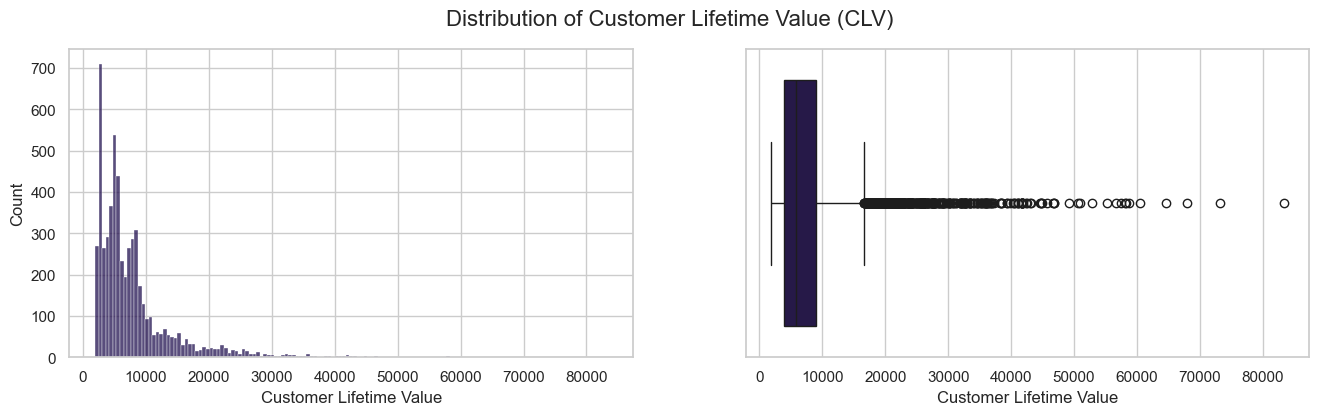

In [77]:
# Set the Seaborn theme, style, font, and color palette
sns.set_theme(style='whitegrid', font='Arial', palette='magma')

# Create a figure
fig = plt.figure(figsize=(16,4))

# Set the title
fig.suptitle('Distribution of Customer Lifetime Value (CLV)', size=16)

# Create subplots
plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

Based on the distribution plot of Customer Lifetime Value above, it can be observed that the data follows a `right-skewed distribution.` This indicates that there are many customers with `low CLV` and very few customers with `high CLV.` Additionally, in the boxplot, it is evident that there are customers with extremely high Customer Lifetime Value, identified as outliers, with values above ±16000.

### Distribution of Numerical Feature

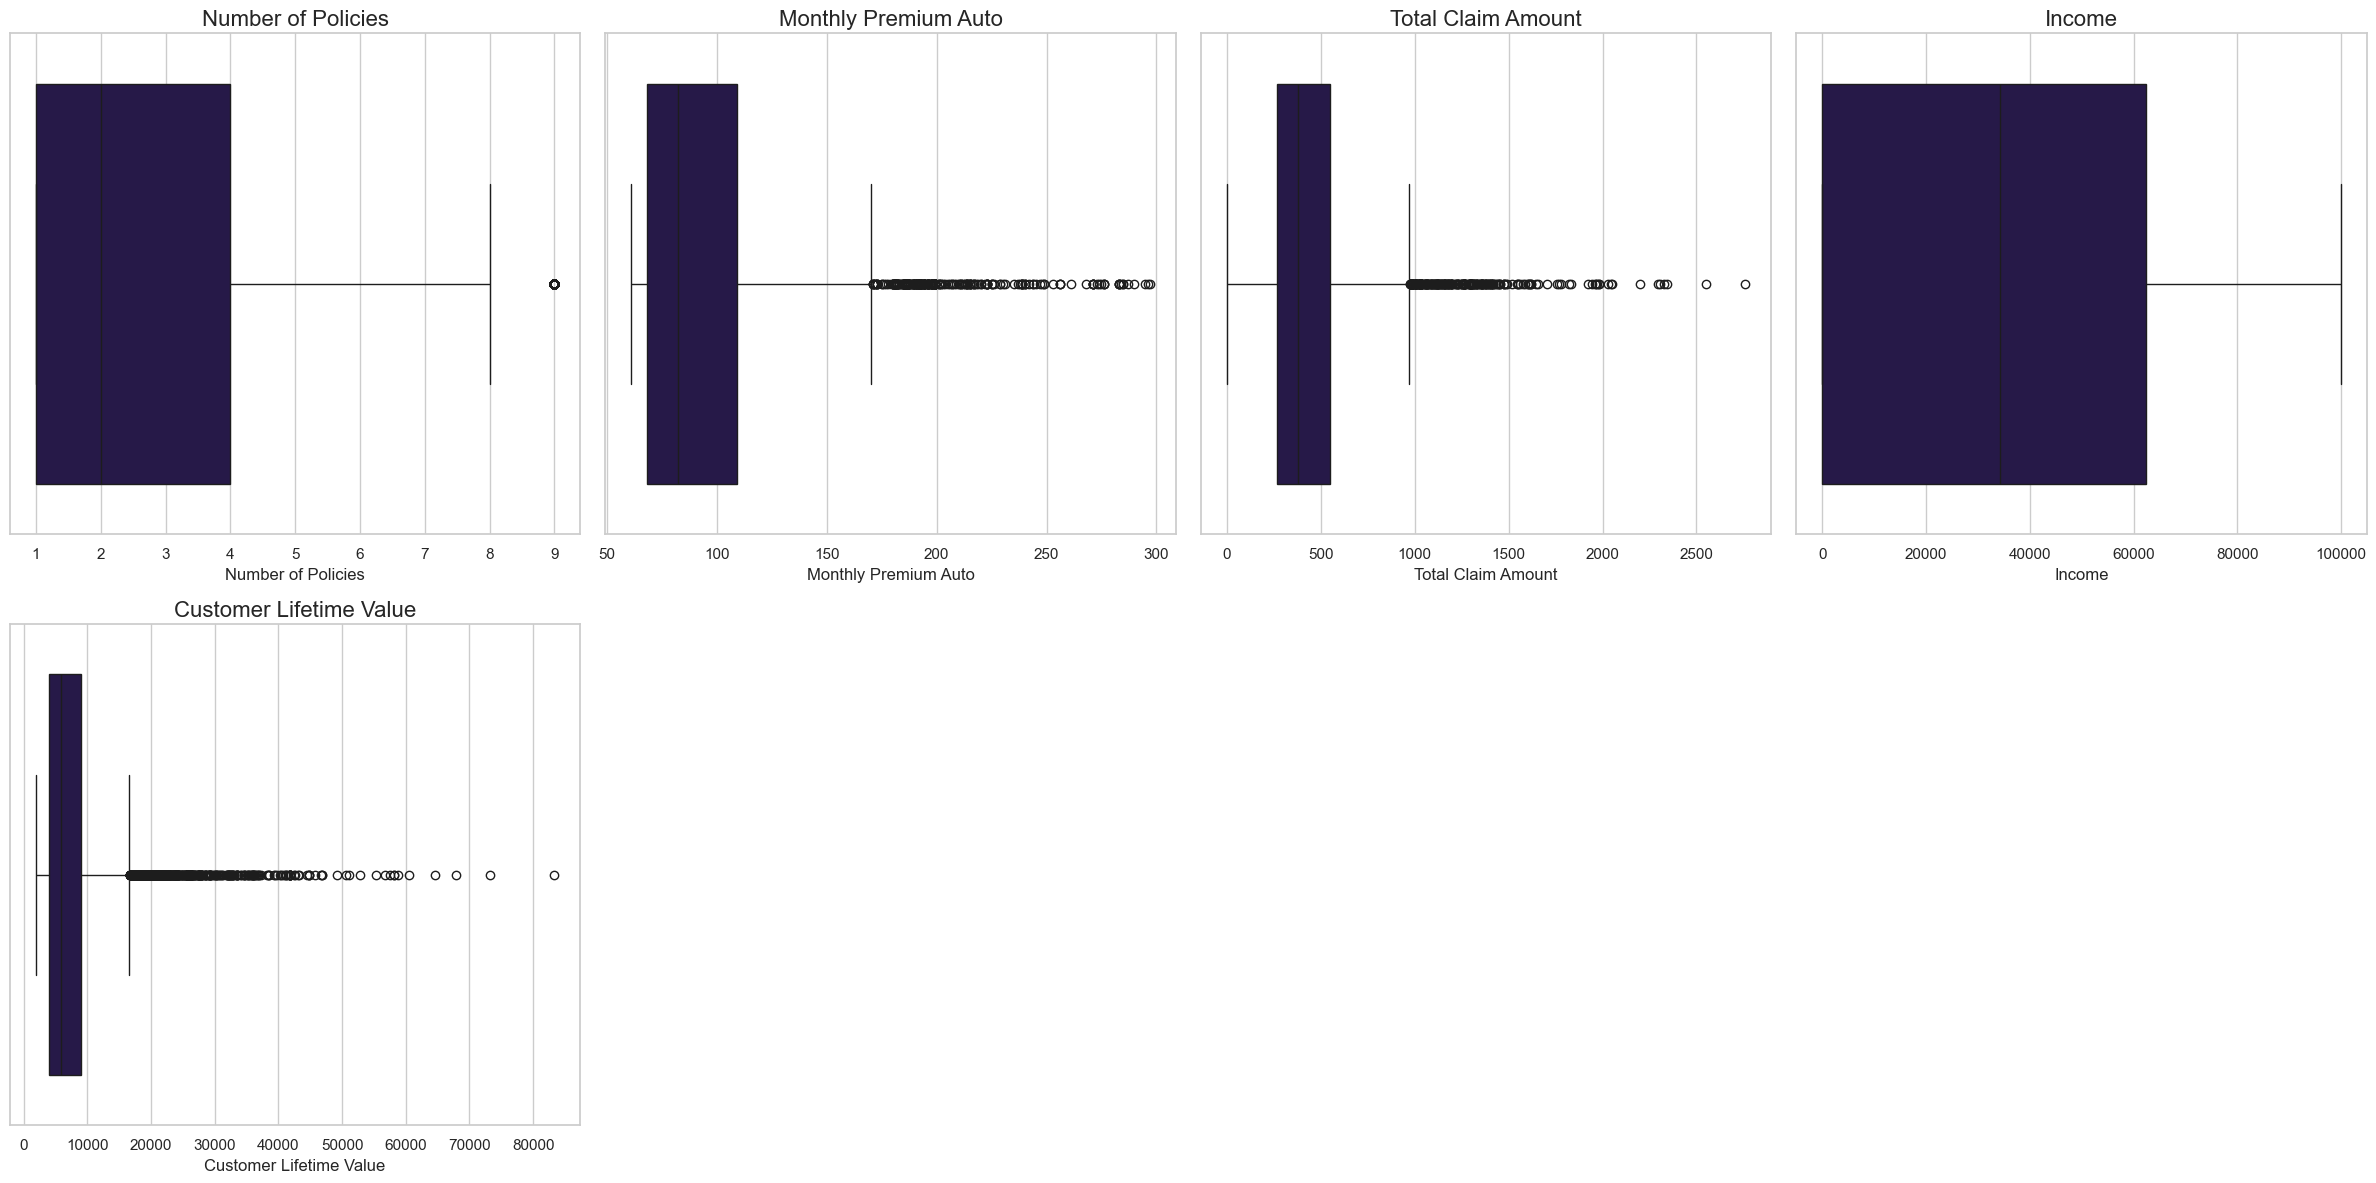

In [78]:
# Extract numerical columns from the DataFrame
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_numerical_cols = len(numerical_cols)

# Calculate the number of rows and columns for subplots
num_subplot_rows = (num_numerical_cols + 3) // 4  # Pembulatan ke atas
num_subplot_cols = min(num_numerical_cols, 4)  # Maksimal 4 kolom subplot

# Create a figure with appropriate size
plt.figure(figsize=(6*num_subplot_cols, 6*num_subplot_rows))

# Iterate through numerical columns and create boxplots
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(num_subplot_rows, num_subplot_cols, i)
    sns.boxplot(data=df, x=col)
    plt.title(col, size=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Looking at the distribution of numerical features, it is known that these features are not normally distributed (skewed), and there are outliers in the features `Number of Policies`, `Monthly Premium Auto`, and `Total Claim Amount`, which will be addressed in the Data Preprocessing section. However, since I want to see the correlation between numerical features and the target, visualization with scatterplots and a heatmap is needed.

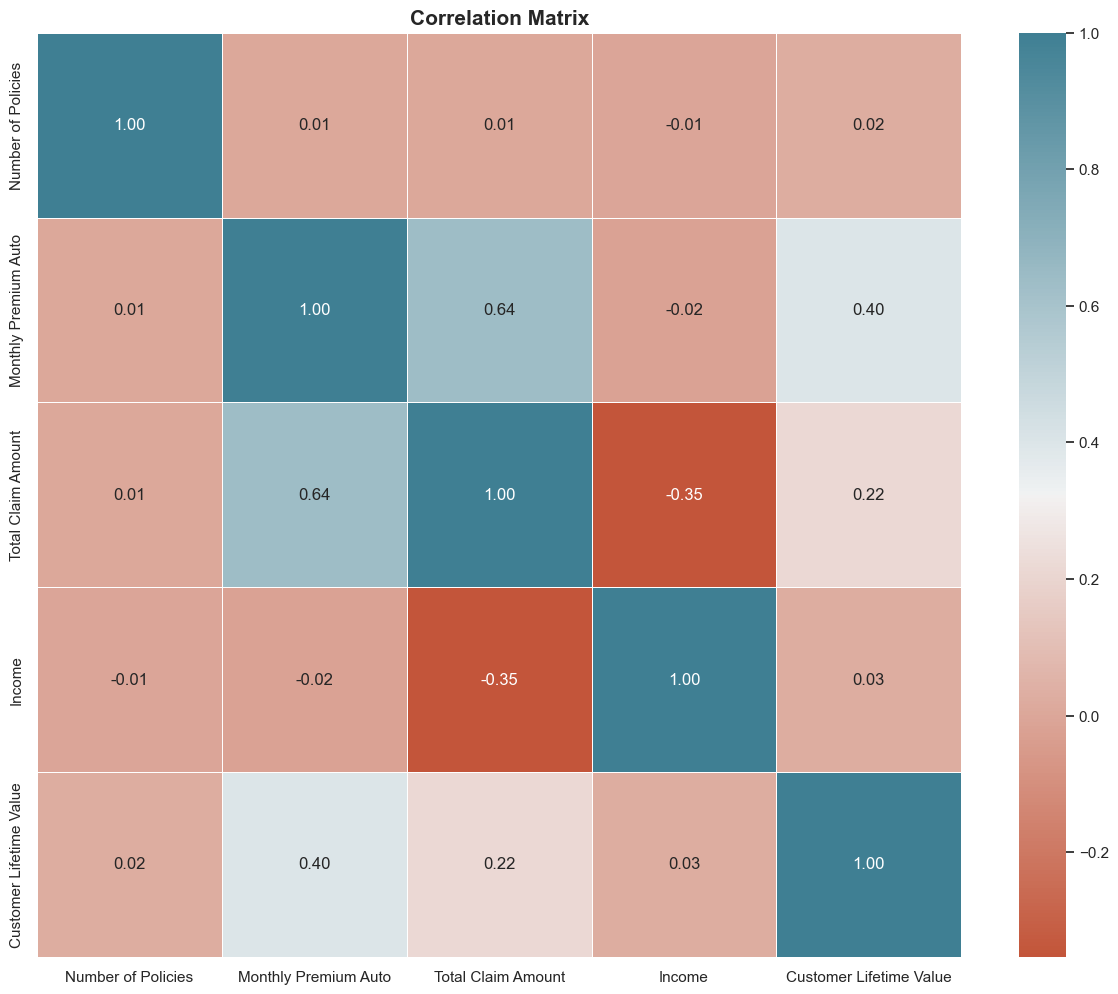

In [79]:
# Extract correlation matrix for all numerical features
numerical_features = df.select_dtypes(include='number')
corr_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

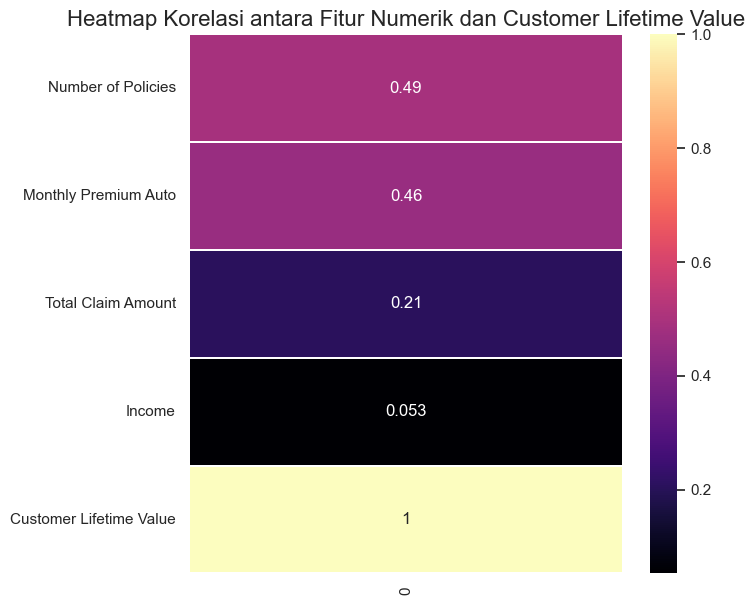

In [80]:
# Select only numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation between numerical features and the target
corr_with_target = df[numerical_cols].corrwith(df['Customer Lifetime Value'], method='spearman')

# Create a heatmap of the correlation
plt.figure(figsize=(7, 7))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='magma', linewidths=0.05)
plt.title('Heatmap Korelasi antara Fitur Numerik dan Customer Lifetime Value', size=16)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


The heatmap above indicates that `Customer Lifetime Value` has the strongest positive correlation with the feature `Number of Policies` (0.49). Meanwhile, the feature `Income` is the least correlated feature with `Customer Lifetime Value` (0.053). Additionally, it turns out that there is a strong correlation between two features, namely `Monthly Premium Auto` and `Total Claim Amount` (0.53).

### Distribution of Categorical Feature

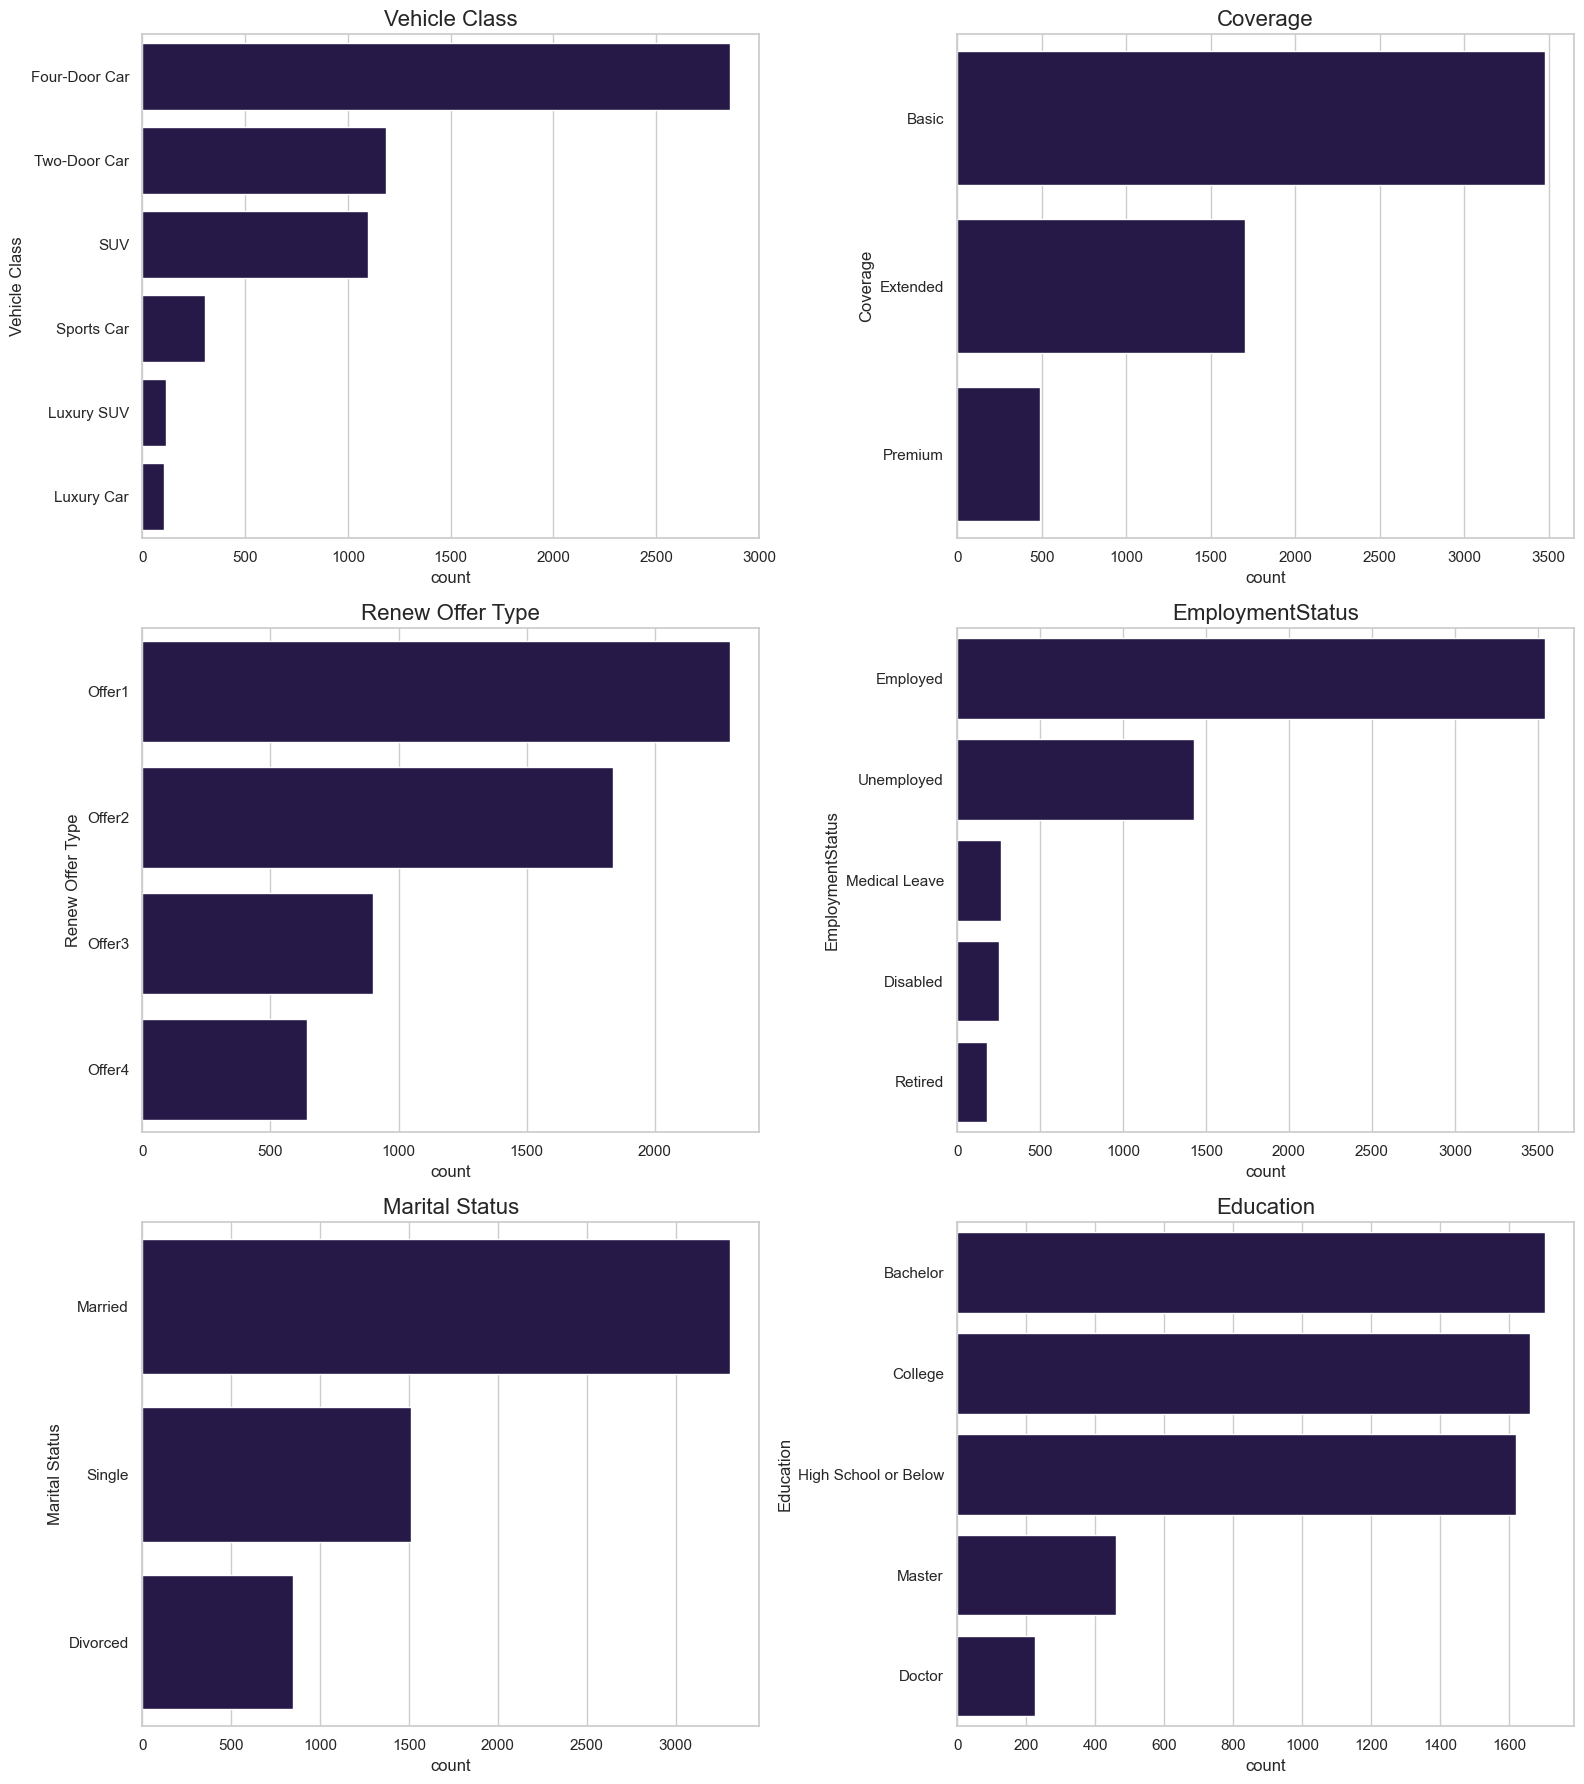

In [81]:
# Extract categorical columns from the DataFrame
categorical_cols = list(df.select_dtypes(include='object').columns)
num_categorical_cols = len(categorical_cols)

# Calculate the number of rows and columns for subplots
num_subplot_rows = (num_categorical_cols + 1) // 2  # Pembulatan ke atas
num_subplot_cols = min(num_categorical_cols, 2)  # Maksimal 2 kolom subplot

# Create a figure with appropriate size
plt.figure(figsize=(8*num_subplot_cols, 6*num_subplot_rows))

# Iterate through categorical columns and create countplots
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(num_subplot_rows, num_subplot_cols, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(col, size=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Looking at the categorical features, it is known that:
- Customers who own a Four-Door Car are the most common customers insuring their vehicles.
- The majority of customers choose the `Coverage` Basic package for their vehicle insurance.
- When it comes to renewing policies, most customers accept Offer 1 compared to other offers.
- The majority of vehicle insurance customers are already employed, married, and have a bachelor's degree in education.

### Distribution of Categorical Feature vs Target

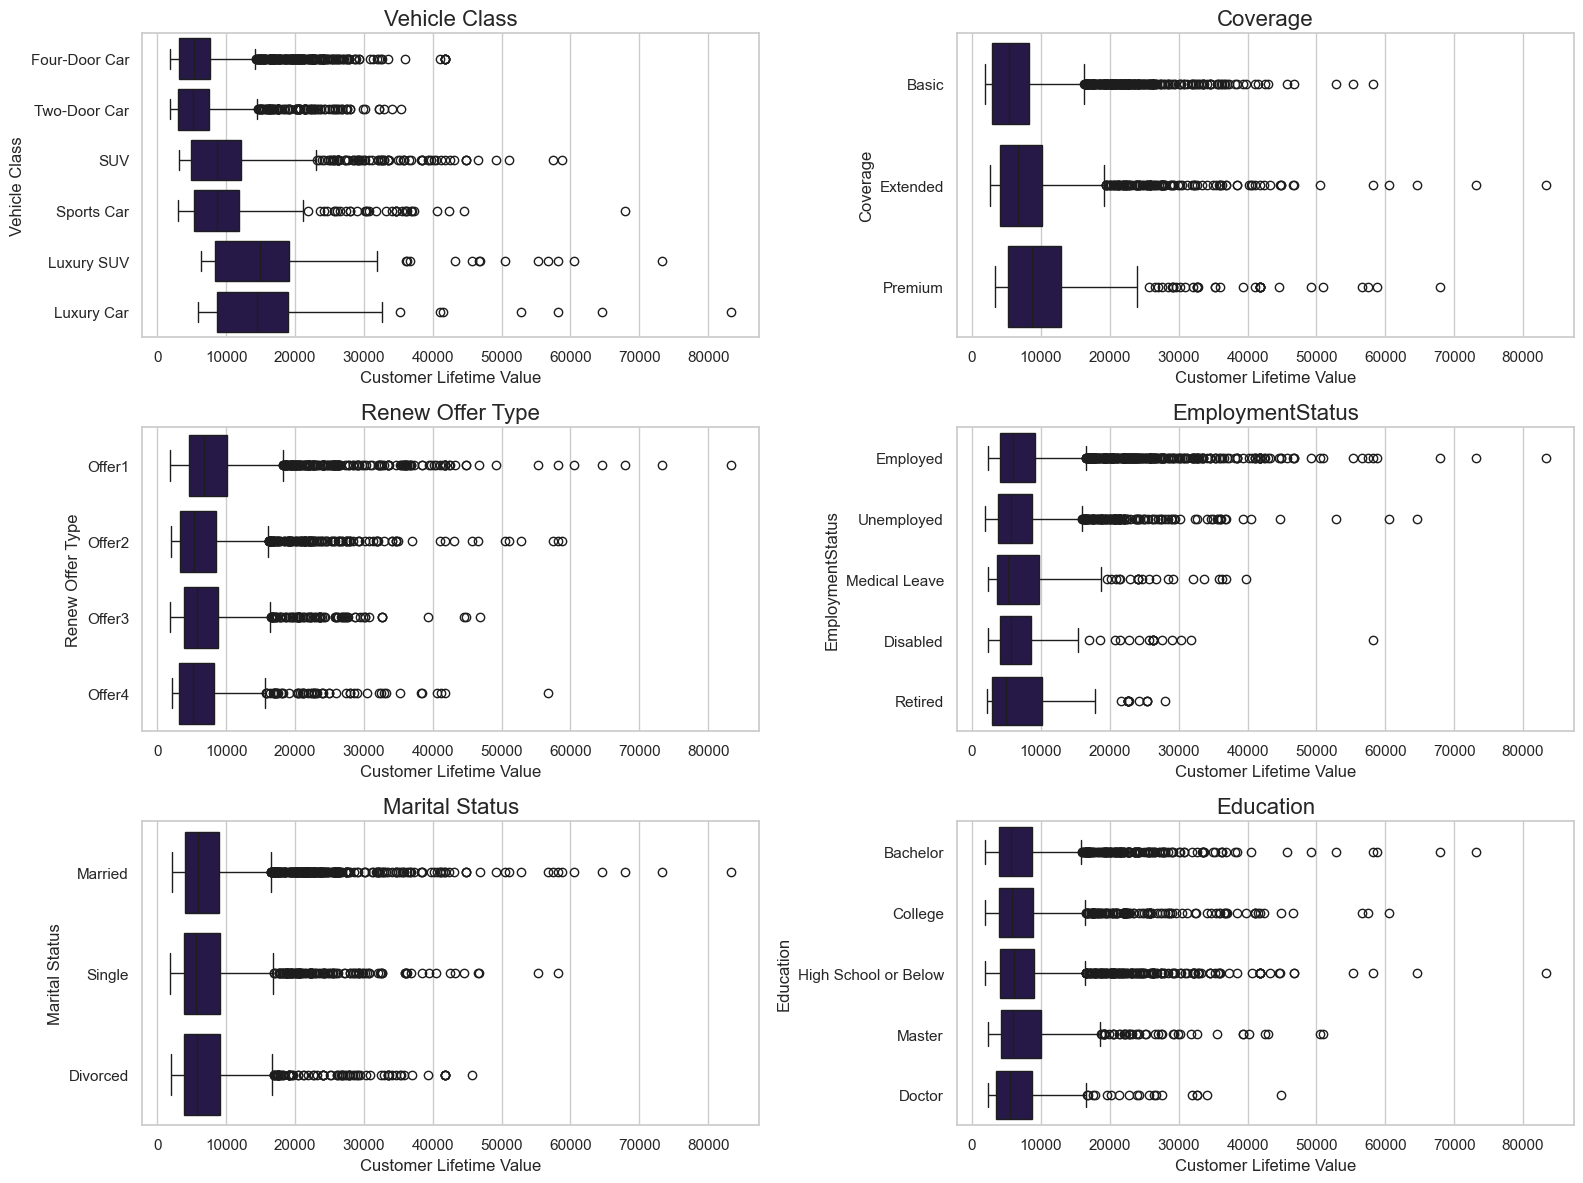

In [82]:
# Set the figure size
plt.figure(figsize=(16, 12))
num_subplot = 1

# Iterate through categorical columns and create boxplots
for i in categorical_cols:
    plt.subplot(3, 2, num_subplot)
    sns.boxplot(data=df, y=i, x='Customer Lifetime Value', order=df[i].value_counts().index)
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot += 1

# Display the plots
plt.show()


When the distribution of categorical features is displayed with the target, it is found that:
- Customers with luxury-type vehicles (Luxury SUV / Luxury Car) have a 'high CLV' compared to customers with other types of vehicles.
- Customers with `Premium` coverage have a higher CLV than other `Coverage` types.
- Customers who accept Offer 1 tend to be 'high-CLV' customers compared to those who accept other types of offers.
- 'High-CLV' customers are also found more frequently among customers who are already employed and married.

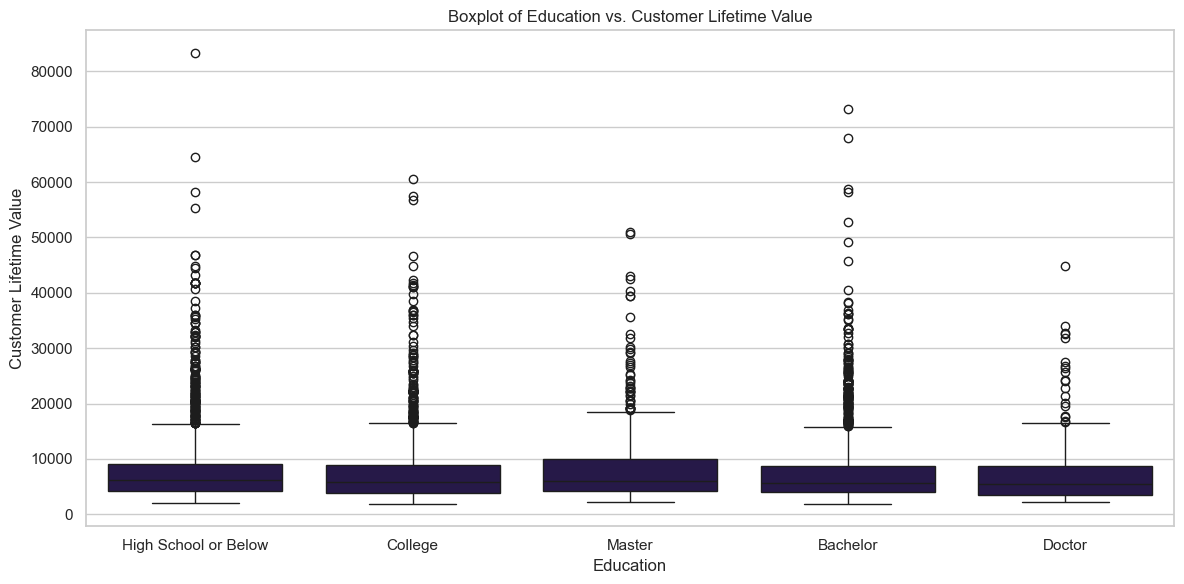

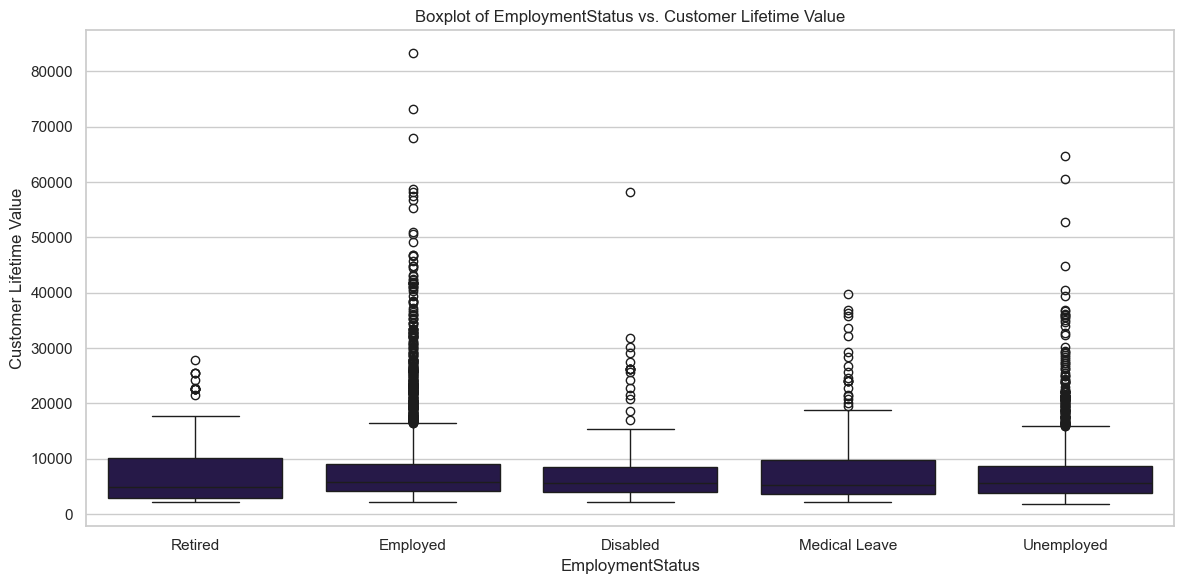

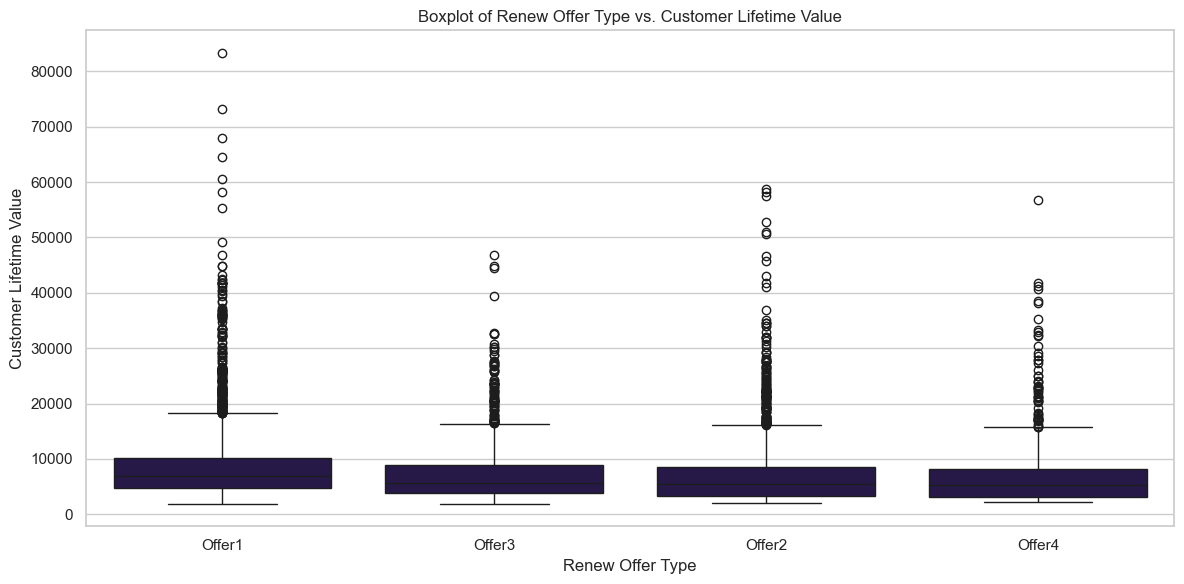

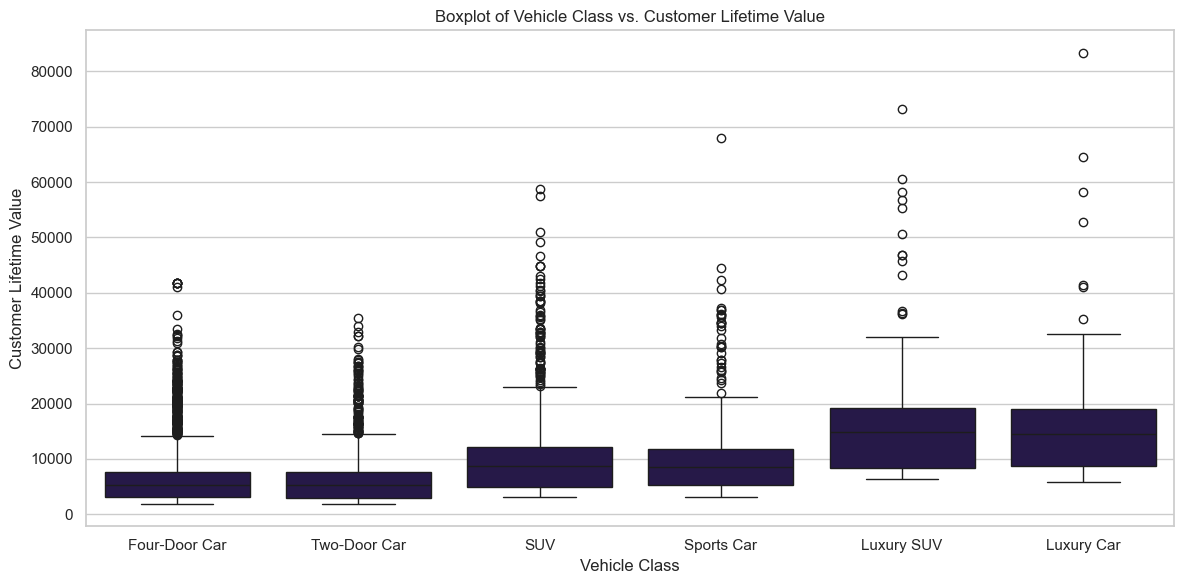

In [83]:
# Boxplot for categorical variables
categorical_vars = ['Education', 'EmploymentStatus', 'Renew Offer Type', 'Vehicle Class']

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='Customer Lifetime Value', data=df)
    plt.title(f'Boxplot of {var} vs. Customer Lifetime Value')
    plt.xlabel(var)
    plt.ylabel('Customer Lifetime Value')
    plt.tight_layout()  # To ensure tight layout
    plt.show()


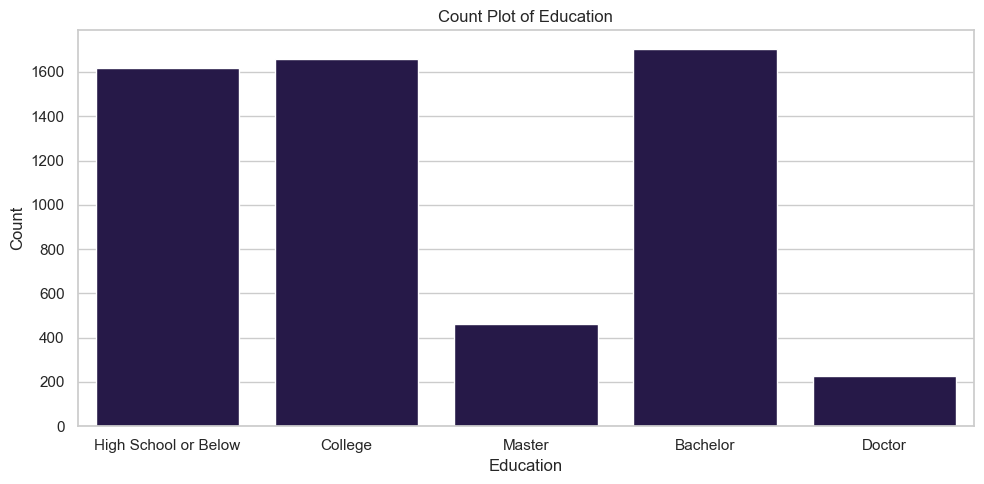

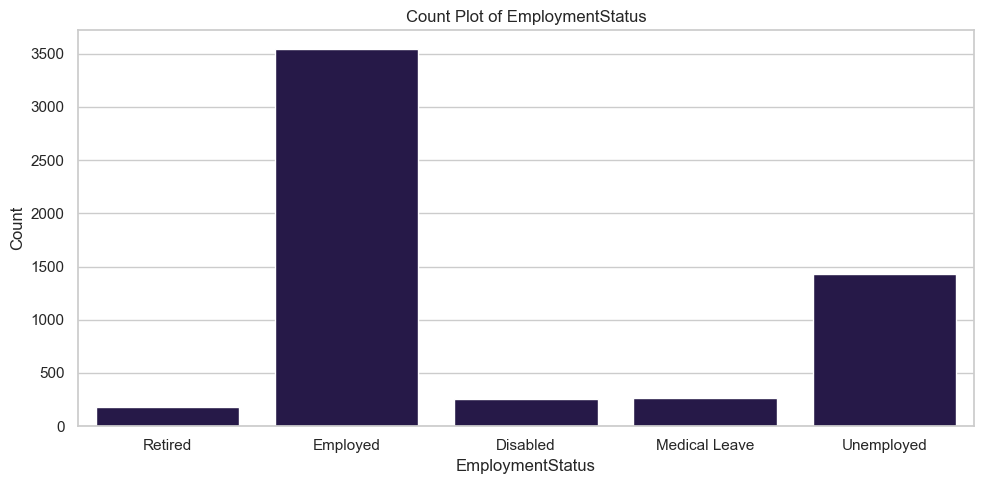

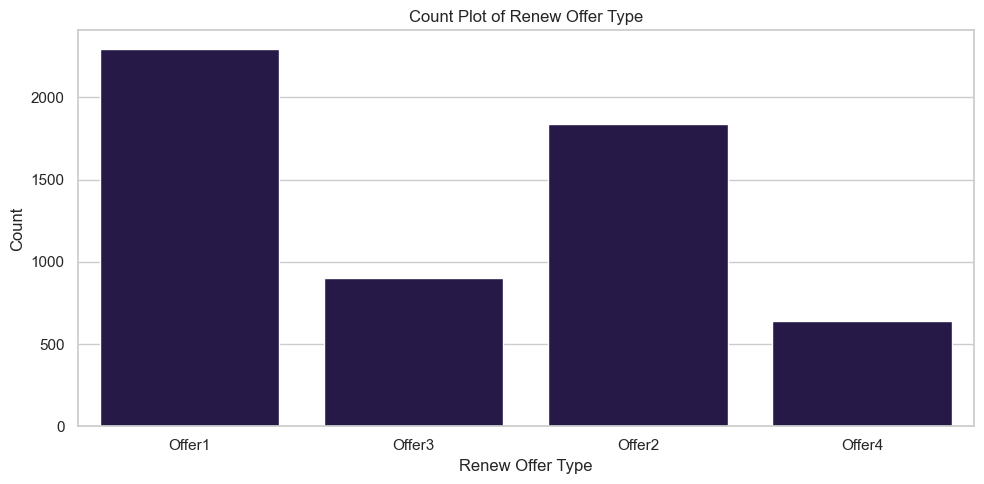

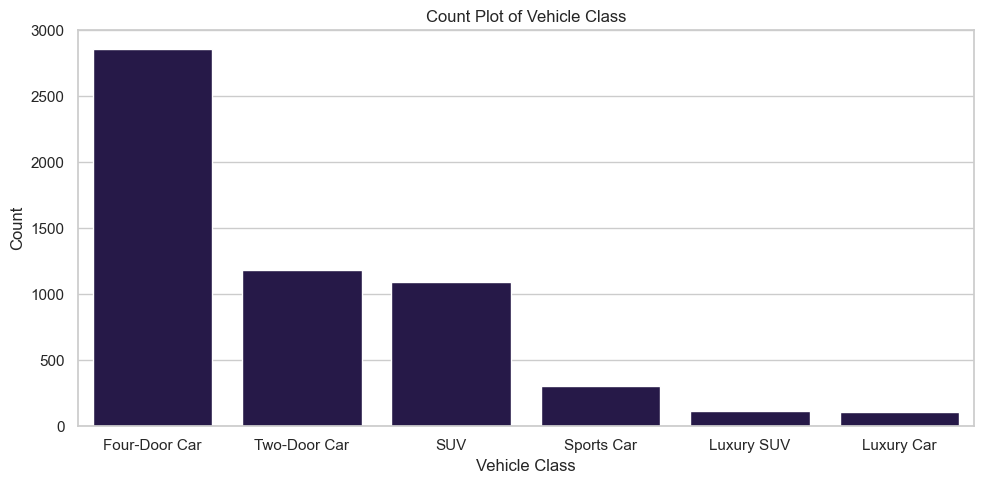

In [84]:
# Count plot for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()  # To ensure tight layout
    plt.show()

### Other Correlation

To enhance understanding of the dataset, I also display a scatterplot of numerical features with CLV, differentiated by the hue of the `Coverage` and `Vehicle Class` features.

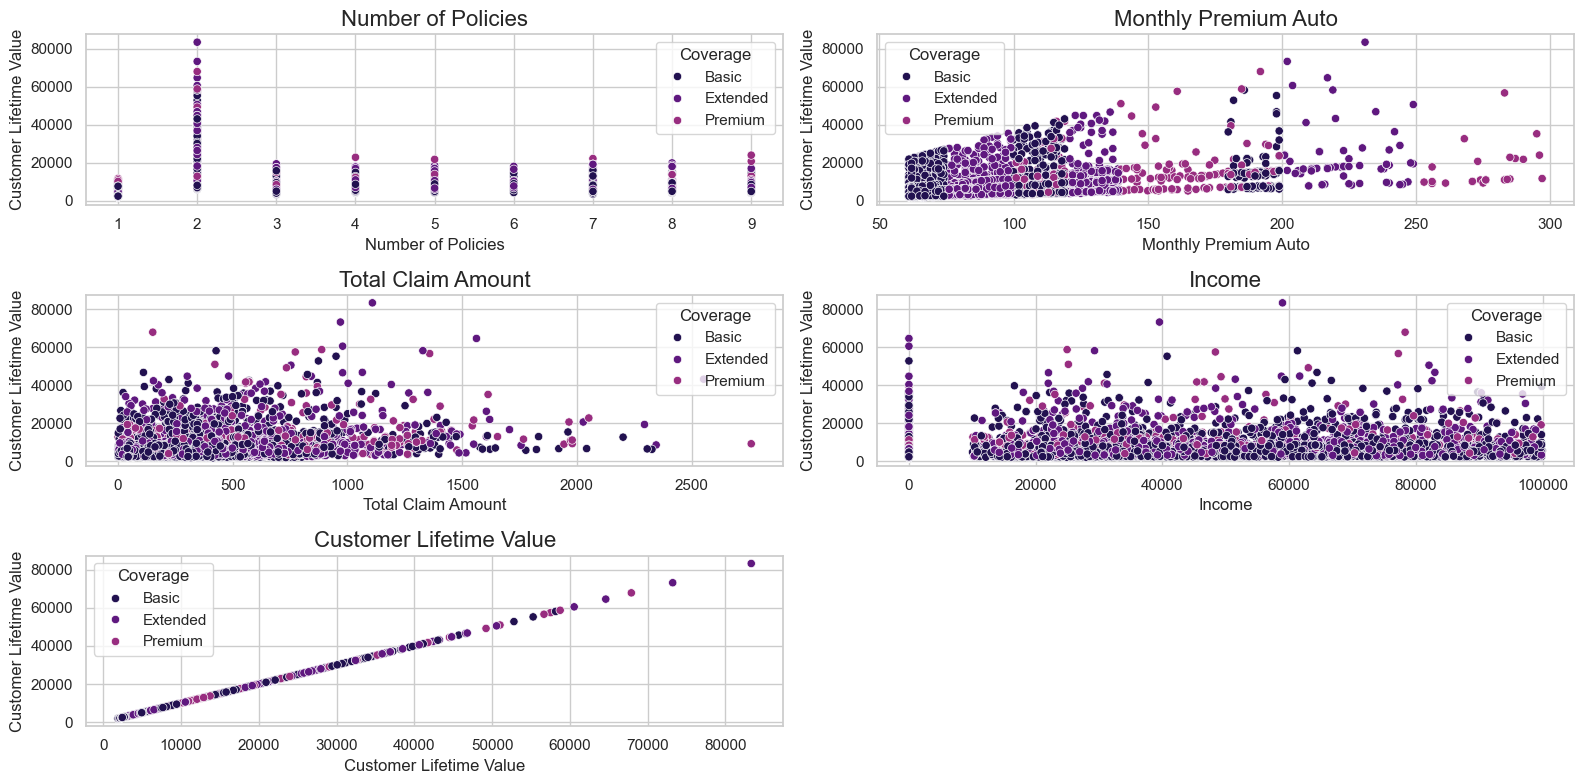

In [85]:
# Set the figure size
plt.figure(figsize=(16, 8))
num_subplot = 1
num_numerical_cols = len(numerical_cols)

# Calculate the number of rows and columns for subplots
num_subplot_rows = (num_numerical_cols + 1) // 2  # Round up
num_subplot_cols = min(num_numerical_cols, 2)  # Maximum of 2 subplot columns

# Iterate through numerical columns and create scatterplots
for i in numerical_cols:
    plt.subplot(num_subplot_rows, num_subplot_cols, num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Coverage', hue_order=['Basic', 'Extended', 'Premium'])
    plt.title(i, size=16)
    num_subplot += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

Based on the above scatterplot, there is a significant pattern change in `Monthly Premium Auto` vs. `Customer Lifetime Value` differentiated by its `Coverage`. This indicates that for each `Coverage`, there might be further class divisions (e.g., Basic I, Basic II, Basic III, etc.) where the range of premiums paid also differs. However, such distinctions are not present in the dataset.

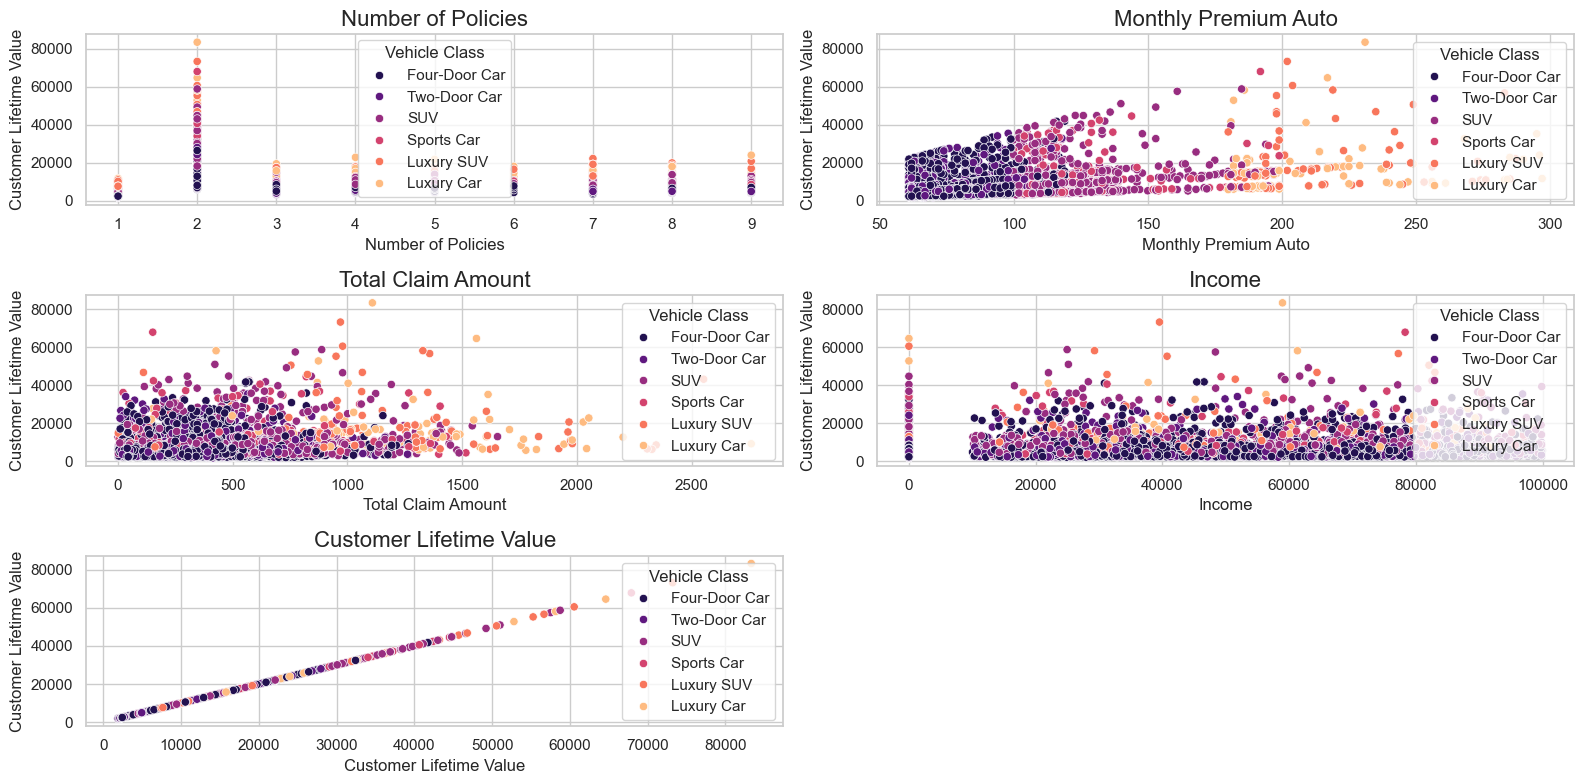

In [86]:
# Set the figure size
plt.figure(figsize=(16, 8))
num_subplot = 1
num_numerical_cols = len(numerical_cols)

# Calculate the number of rows and columns for subplots
num_subplot_rows = (num_numerical_cols + 1) // 2  # Round up
num_subplot_cols = min(num_numerical_cols, 2)  # Maximum of 2 subplot columns

# Iterate through numerical columns and create scatterplots
for i in numerical_cols:
    plt.subplot(num_subplot_rows, num_subplot_cols, num_subplot)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value', hue='Vehicle Class', palette='magma')
    plt.title(i, size=16)
    num_subplot += 1

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

Then, the same scatterplot, but differentiated by its `Vehicle Class`, also shows a different pattern in `Monthly Premium Auto` vs. `Customer Lifetime Value`, where:
- The 'Four-Door Car' and 'Two-Door Car' vehicle types have premiums in the range of approximately $60-100.
- The 'SUV' and 'Sports Car' vehicle types have premiums in the range of approximately $100-170.
- The 'Luxury SUV' and 'Luxury Car' vehicle types have premiums in the range of approximately $170-300.

## **Data Preprocessing**

In this stage, I will perform several feature engineering steps on the dataset to prepare the data for further modeling. Feature engineering is crucial because, according to the concept of Machine Learning, `Garbage in, Garbage Out,` as good as the process or as sophisticated as the method/modeling used, if we input `garbage,` the result will also be `garbage` (inputting poor-quality data leads to poor-quality modeling).

For this feature engineering, I will:
- Drop duplicated data
- Drop outliers
- Perform encoding

Before starting, I will duplicate the initial dataset into a new dataset specifically for preprocessing and modeling to avoid changing the values/form of the original dataset.

In [87]:
# Membuat duplikat dataset agar tidak mengubah dataset awal
df_model = df.copy()

### Drop Duplicated Data

In [88]:
# Check for duplicate data
df_model.duplicated().sum()

# Print the result
print(f"Jumlah data duplikat: {df_model.duplicated().sum()}")

Jumlah data duplikat: 618


In [89]:
# Show duplicate data
df_model[df_model.duplicated()].sort_values('Customer Lifetime Value').head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2763,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755


In this dataset, it is observed that there are **618 duplicate** customer records. The term `duplicate data` refers to customer data that has exactly the same values as data in other rows. Dropping duplicate data is necessary to ensure that during modeling, the algorithm learns from specific data only. If duplicate data is retained, the model algorithm will overly focus on learning from those duplicated data, resulting in less accurate predictions (bias). Therefore, the next step is to drop these **618 duplicate data**.

In [90]:
# Drop data duplicates
df_model = df_model.drop_duplicates()

# Menampilkan jumlah baris dan kolom setelah drop duplicates
print(f'How many Rows: {df_model.shape[0]}\nHow Many Columns: {df_model.shape[1]}')

How many Rows: 5051
How Many Columns: 11


### Outlier Detection

Outliers are data points whose values differ or deviate significantly from the usual observations. The presence of outliers can also impact the results of analysis and modeling. Treating outliers cannot immediately remove the outliers in the dataset, as it may potentially eliminate a significant amount of data. Therefore, outlier treatment also needs to consider domain knowledge. However, by treating outliers, the modeling will have limitations in predicting CLV based on a clean dataset alone. Beyond the data range, the predictions from the model will become inaccurate.

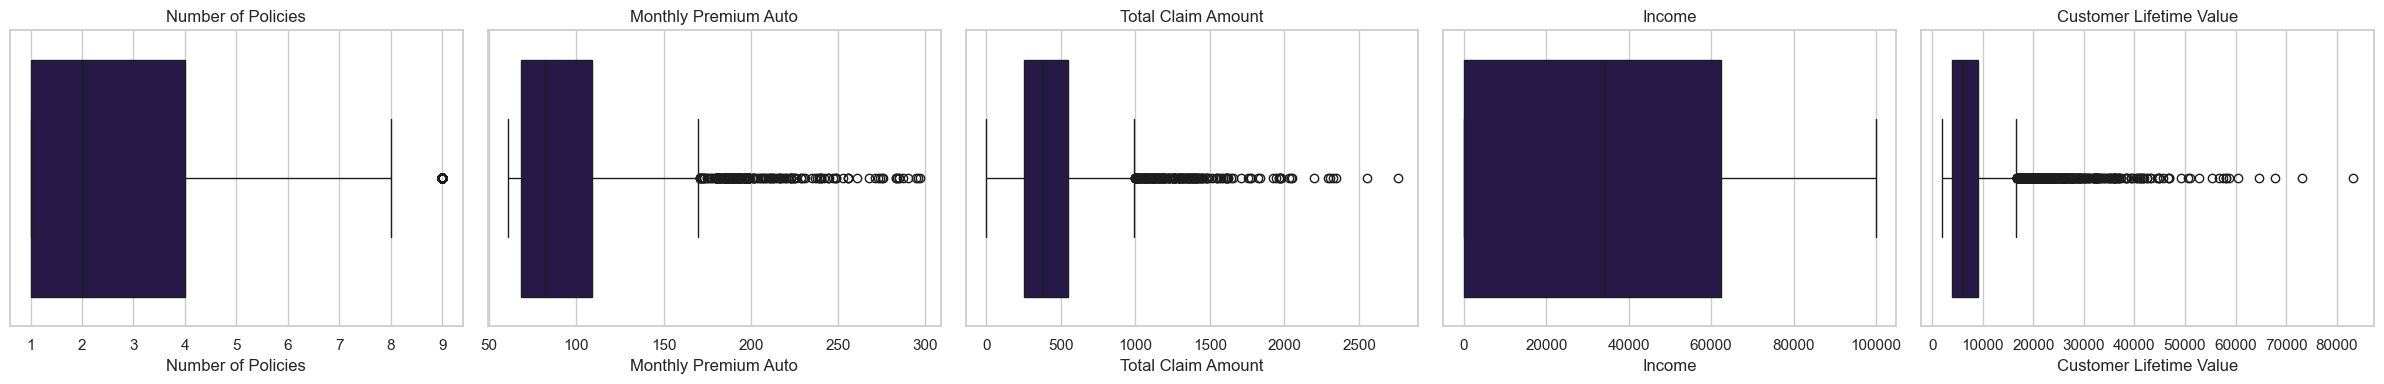

In [91]:
# Display boxplots to visualize outliers
plt.figure(figsize=(24,4))
num_subplot = 1

# Iterate through numerical columns and create boxplots
for i in df.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=df_model, x=i),
    plt.title(i),
    plt.tight_layout()
    num_subplot+=1

From the above boxplot, outliers are observed in some features such as `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, `Income`, and `Customer Lifetime Value`. In this project, I will treat these outliers by considering the values of IQR and domain knowledge to create a cleaner dataset. This aims to improve the model's performance and the prediction of CLV values.

In [92]:
# Create a function for IQR-based outlier detection
def iqr_detection(data):
    q1 = df_model[data].quantile(0.25)
    q3 = df_model[data].quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    
    # Print IQR and bounds
    print(f'Nilai IQR {data}: {iqr}')
    print(f'Nilai Upperbound: {q3 + limit}')
    print(f'Nilai Lowerbound: {q1 - limit}')
    
    return q1 - limit, q3 + limit

#### Feature: Number of Policies

In [93]:
# Show number IQR of 'Number of Policies'
iqr_detection('Number of Policies')

Nilai IQR Number of Policies: 3.0
Nilai Upperbound: 8.5
Nilai Lowerbound: -3.5


(-3.5, 8.5)

In [94]:
# Show descriptive statistics from 'Number of Policies'
df_model['Number of Policies'].describe()

count    5051.000000
mean        2.992081
std         2.386500
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [95]:
# Check unique values in 'Number of Policies' and count data above upper bound
unique_values = df_model['Number of Policies'].unique()
above_upperbound_count = len(df_model[df_model['Number of Policies'] > 8.5])

# Print the results
print(f"Jumlah unique value pada 'Number of Policies': {unique_values}")
print(f"Jumlah data di atas nilai upperbound 'Number of Policies': {above_upperbound_count}")

Jumlah unique value pada 'Number of Policies': [2. 6. 1. 8. 5. 3. 7. 4. 9.]
Jumlah data di atas nilai upperbound 'Number of Policies': 228


For the `Number of Policies` feature, it is found that the upperbound value is 8.5, and based on the number of data, only the value 9 in the `Number of Policies` exceeds the upperbound, with a total of 228 customers. Although, in the boxplot, customers with 9 policies are considered outliers, I chose not to drop these outliers to provide predictions for customers with up to 9 policies. This decision is further supported by the heatmap correlation above, which indicates that CLV has the strongest positive correlation with the `Number of Policies`. Thus, I want to determine whether the `Number of Policies` will be an influential feature in the model or not.

#### Feature: Monthly Premium Auto

In [96]:
# show the number IQR of 'Monthly Premium Auto'
iqr_detection('Monthly Premium Auto')

Nilai IQR Monthly Premium Auto: 41.0
Nilai Upperbound: 170.5
Nilai Lowerbound: 6.5


(6.5, 170.5)

In [97]:
# show descriptive statistics of 'Monthly Premium Auto'
df_model['Monthly Premium Auto'].describe()

count    5051.000000
mean       92.911107
std        34.335010
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [98]:
# Count data points above upper bound for 'Monthly Premium Auto'
above_upperbound_count = len(df_model[df_model['Monthly Premium Auto'] > 170.5])

# Print the result
print(f"Jumlah data di atas nilai upperbound 'Monthly Premium Auto': {above_upperbound_count}")

Jumlah data di atas nilai upperbound 'Monthly Premium Auto': 252


For the `Monthly Premium Auto` feature, it is found that the upperbound value is $170.5, and the number of data points based on this upperbound value is 252 customers. If I were to drop outliers in `Monthly Premium Auto` based on its upperbound value alone, it would certainly result in a significant loss of data for modeling.

Furthermore, considering domain knowledge, auto insurance in the United States is regulated by state, and prices are determined based on postal codes. This suggests that customers from New York may have different auto insurance premium costs than customers from California. According to a 2019 study, Michigan is the state with the [highest average premiums](https://www.insurancebusinessmag.com/us/guides/which-us-state-has-the-highest-auto-insurance-premiums-159759.aspx) compared to other states ($224.42 per month / $2,693 per year). Therefore, I assume that the highest limit for `Monthly Premium Auto` is $224.42, and values above this threshold will be dropped.

This introduces a limitation to the model, indicating that the model predicting `Monthly Premium Auto` above $224.42 may be less accurate.

#### Feature: Total Claim Amount

In [99]:
# Show the number IQR of 'Total Claim Amount'
iqr_detection('Total Claim Amount')

Nilai IQR Total Claim Amount: 296.34681750000004
Nilai Upperbound: 992.6433477500001
Nilai Lowerbound: -192.74392225000005


(-192.74392225000005, 992.6433477500001)

In [100]:
# Show descriptive statistics of 'Total Claim Amount'
df_model['Total Claim Amount'].describe()

count    5051.000000
mean      429.798954
std       293.129102
min         0.423310
25%       251.776304
50%       374.400000
75%       548.123122
max      2759.794354
Name: Total Claim Amount, dtype: float64

In [101]:
# Count data points above upper bound for 'Total Claim Amount'
above_upperbound_count = len(df_model[df_model['Total Claim Amount'] > 992.64])

# Print the result
print(f"The number of data above the upper bound of 'Total Claim Amount': {above_upperbound_count}")

The number of data above the upper bound of 'Total Claim Amount': 217


**Translation:**
For the `Total Claim Amount` feature, it is found that the upperbound value is $992.64, and the number of data points based on this upperbound value is 217 customers. If outliers were dropped based on its upperbound value alone, a significant amount of data would be discarded, and model creation would be less optimal. Therefore, the dropping of outliers will be combined based on domain knowledge.

In [2019](https://www.bankrate.com/insurance/car/auto-insurance-statistics/#what-types-of-auto-insurance-claims-are-filed), it was reported that owners of private vehicles could file the most expensive all-risk insurance claims (comprehensive claims), reaching up to $1777. Therefore, in this case, I assume that the highest limit for `Total Claim Amount` is $1777, and values above this threshold will be dropped.

This introduces a limitation to the model, indicating that the model predicting `Total Claim Amount` above $1777 may be less accurate.

#### Target: Customer Lifetime Value

In [102]:
# Show number IQR of 'Customer Lifetime Value'
iqr_detection('Customer Lifetime Value')

Nilai IQR Customer Lifetime Value: 5064.1236284999995
Nilai Upperbound: 16624.75007525
Nilai Lowerbound: -3631.744438749999


(-3631.744438749999, 16624.75007525)

In [103]:
# Show descriptive statistics of 'Customer Lifetime Value'
df_model['Customer Lifetime Value'].describe()

count     5051.000000
mean      8059.483178
std       6989.189674
min       1898.007675
25%       3964.441004
50%       5837.528088
75%       9028.564632
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [104]:
# Count data points above upper bound for 'Customer Lifetime Value'
above_upperbound_count = len(df_model[df_model['Customer Lifetime Value'] > 16624.75])

# Print the result
print(f"Jumlah data di atas nilai upperbound 'Customer Lifetime Value': {above_upperbound_count}")

Jumlah data di atas nilai upperbound 'Customer Lifetime Value': 449


It is evident that 75% of the data in the target variable `Customer Lifetime Value` is less than 9028.56, while the maximum value is 83325.38. This indicates a positive skewness in its distribution. However, when viewed based on its upperbound value, there are 449 data points with `Customer Lifetime Value` greater than 16624.75. Therefore, customer data with CLV greater than 16624.75 will not be included in the modeling, and this will undoubtedly be a limitation for the model to be constructed.

#### Drop Outlier

In [105]:
# Combine outlier limits into one dataframe
outlier = df_model[
    (df_model['Monthly Premium Auto'] > 224.42) |
    (df_model['Customer Lifetime Value'] > 16624.75) |
    (df_model['Total Claim Amount'] > 1777)
]

# Print the length of the outlier dataframe
len(outlier)

478

After determining the limits for outliers to be dropped, I then combined all these limits into one dataframe named `outlier`. Once combined, there are 478 customer data points that will be dropped, resulting in a clean dataset ready for further processing.

In [106]:
# Drop outlier
df_model = df_model.drop(index= outlier.index)

[Text(0.5, 1.0, 'Monthly Premium Auto (After Filtering)')]

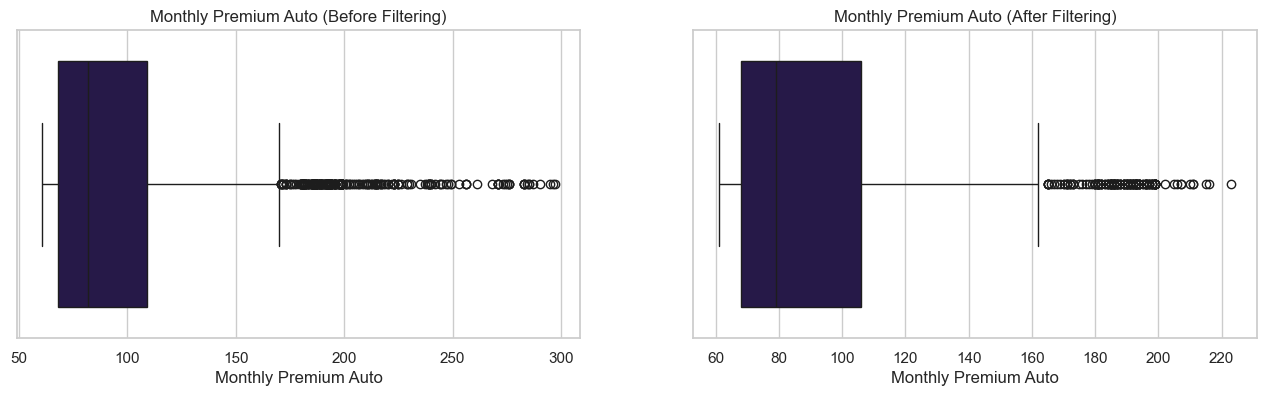

In [107]:
# Display boxplots for 'Monthly Premium Auto' before and after dropping outliers
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Monthly Premium Auto').set(title='Monthly Premium Auto (Before Filtering)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_model, x='Monthly Premium Auto').set(title='Monthly Premium Auto (After Filtering)')

[Text(0.5, 1.0, 'Total Claim Amount (After Filtering)')]

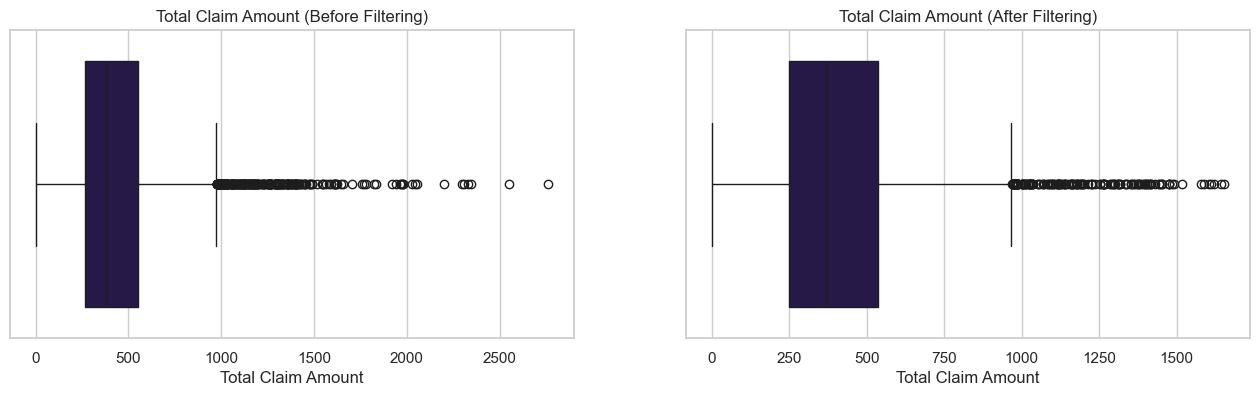

In [108]:
# Display boxplots for 'Total Claim Amount' before and after dropping outliers
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Total Claim Amount').set(title='Total Claim Amount (Before Filtering)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_model, x='Total Claim Amount').set(title='Total Claim Amount (After Filtering)')

[Text(0.5, 1.0, 'Customer Lifetime Value (After Filtering)')]

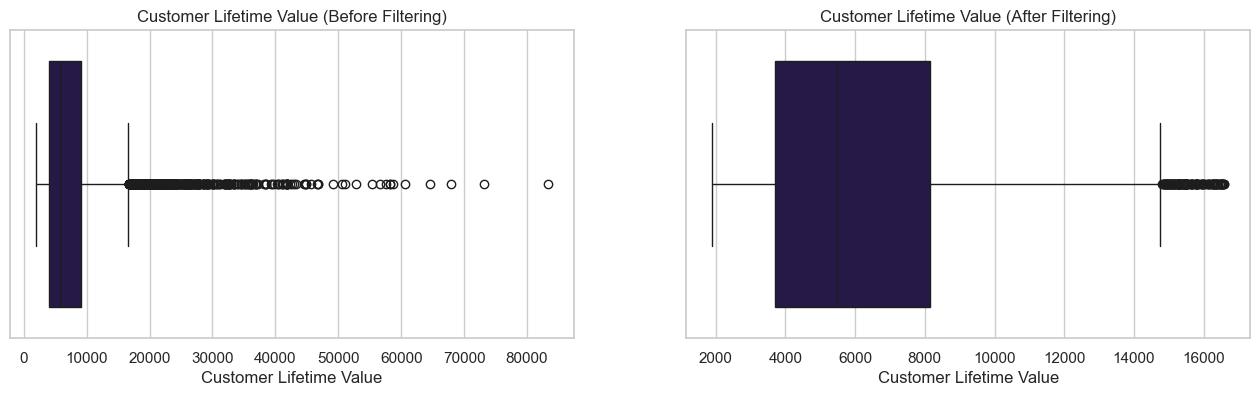

In [109]:
# Display boxplots for 'Customer Lifetime Value' before and after dropping outliers
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Customer Lifetime Value').set(title='Customer Lifetime Value (Before Filtering)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_model, x='Customer Lifetime Value').set(title='Customer Lifetime Value (After Filtering)')

#### Clean Dataset

In [110]:
# Check dataset information again
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4573 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4573 non-null   object 
 1   Coverage                 4573 non-null   object 
 2   Renew Offer Type         4573 non-null   object 
 3   EmploymentStatus         4573 non-null   object 
 4   Marital Status           4573 non-null   object 
 5   Education                4573 non-null   object 
 6   Number of Policies       4573 non-null   float64
 7   Monthly Premium Auto     4573 non-null   float64
 8   Total Claim Amount       4573 non-null   float64
 9   Income                   4573 non-null   float64
 10  Customer Lifetime Value  4573 non-null   float64
dtypes: float64(5), object(6)
memory usage: 428.7+ KB


In the end, there are 4573 rows of data left to be used for modeling. This means that around 19.3% of the data has been eliminated (from drop duplicate and drop outlier) according to the assumptions and arguments presented in the previous processes.

### Data Splitting

In [111]:
# Define X and y
X = df_model.drop(columns='Customer Lifetime Value')
y = df_model['Customer Lifetime Value']

# Data Splitting with a test size ratio of 30% (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

This dataset is being split into training and testing sets using the train_test_split function from scikit-learn. This dataset is divided into features (X) and the target variable (y). The parameter is set into `test_size=0.30` specifies that 30% of the data will be used for testing, and the remaining 70% will be used for training.

### Encoding

Encoding is a method that can be applied to represent categorical variables into numerical values in machine learning. For this project, I used one-hot encoding and ordinal encoding. I used one-hot encoding for the nominal categorical features because they do not have many unique values and do not have a hierarchy between each value. Meanwhile, I used ordinal encoding for the ordinal categorical features where the values have a hierarchy. The following is the division of the encoders used:

- Onehot: `Vehicle Class`, `EmploymentStatus`, `Renew Offer type`, `Marital Status`
- Ordinal: `Coverage`, `Education`

I will use ColumnTransformer to encode these features which will then be applied using Pipeline modeling.

In [112]:
# Ordinal mapping
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

# Combine encoders in a column transformer
col_transform = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping), ['Coverage', 'Education'])
], remainder='passthrough')

col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}]),
                                 ['Coverage', 'Education'])])

### Define Scaler

Because the data used has different values, scaling is needed to change the features so that they have the same scale. For the cross-validation stage, I will use RobustScaler as the initial scaler because it can be 'less sensitive' to outliers. The best scaler will be determined through Hyperparameter Tuning later.

In [113]:
# Define scaler
robust = RobustScaler()

## Modeling and Analysis

In the initial stage, we will perform modeling on the 7 selected benchmark models. Then, the results of these benchmark models are in the form of scoring from the selected metrics for model evaluation, namely RMSE, MAE, and MAPE. The selection of these three metrics is to compare the performance of the model by looking at its residuals.

Explanation of each metric:

RMSE: Root Mean Squared Error. RMSE is very sensitive to outliers because it gives more weight to residual values by squaring them first, so the RMSE value will be larger than MAE. However, RMSE is useful for evaluating models by 'punishing' large residuals more than MAE. The disadvantage of RMSE is that it is more difficult to interpret, so I also use MAE to evaluate the model because its average error is absolute and easier to interpret.

MAE: Mean Absolute Error. MAE is less sensitive to outliers than RMSE because it does not square the residual values. MAE is easier to interpret than RMSE because it is the average of the absolute errors.

MAPE: Mean Absolute Percentage Error. MAPE is a measure of the accuracy of a forecast. It is the average of the absolute percentage errors. MAPE is useful for comparing the performance of models on different datasets because it is scale-invariant.

Basically, RMSE is very sensitive to outliers because it gives more weight to residual values by squaring them first, so the RMSE value will be larger than MAE. However, RMSE is useful for evaluating models by 'punishing' large residuals more than MAE. The disadvantage of RMSE is that it is more difficult to interpret, so I also use MAE to evaluate the model because its average error is absolute and easier to interpret. In addition, I also use MAPE to make it easier for others to understand the percentage error of the model being built.


### Choose a Benchmark Model

In [114]:
# Define algorithms to be used
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
gbr = GradientBoostingRegressor(random_state=0)

# Create a list of models
model = [lr, knn, dt, rf, ada, xgb, gbr]

In [115]:
# Initialize lists for storing scores and metrics
score_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []
score_MAE = []
list_mean_MAE = []
list_std_MAE = []
score_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

# Evaluation Metrics used
scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error'}

# Loop through each model
for i in model:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Create a pipeline with preprocessing, scaling, and the current model
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    score_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    score_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

In [116]:
# Create a DataFrame with cross-validation results before tuning
cvresult_before_tuning = pd.DataFrame({
    'model' : ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boost'],
    'mean_RMSE': list_mean_RMSE,
    'std_RMSE': list_std_RMSE,
    'mean_MAE': list_mean_MAE,
    'std_MAE': list_std_MAE,
    'mean_MAPE': list_mean_MAPE,
    'std_MAPE': list_std_MAPE,
}).round(3)

# Display the DataFrame
cvresult_before_tuning

,model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE
0,Linear Regression,-2791.026,190.815,-2090.465,113.824,-0.381,0.007
1,KNN,-2814.409,173.577,-1928.378,99.869,-0.353,0.024
2,Decision Tree,-1262.164,170.587,-452.819,67.857,-0.055,0.006
3,Random Forest,-948.704,112.741,-378.617,39.949,-0.045,0.003
4,AdaBoost,-1385.840,80.156,-988.713,65.636,-0.147,0.008
5,XGBoost,-1018.236,123.631,-459.293,38.974,-0.068,0.003
6,Gradient Boost,-917.867,133.303,-404.055,36.333,-0.052,0.004


Based on the cross validation above, it is known that there is a difference in the results between the RMSE and MAE values where the RMSE value tends to be higher because the residual values are squared first before being averaged, while the MAE residual values are absolute so they are smaller. The RMSE value is also higher because RMSE gives more weight to large residual values (sensitive to outlier residuals). In other words, there are large error values generated by all algorithms used, so there is a significant difference between RMSE and MAE values.

- Based on the RMSE value, Gradient Boost is the best model. While based on the MAE and MAPE values, RandomForest has the lowest value.
- Predictions will be made on the test set with 2 of the best benchmark models, namely Gradient Boost and RandomForest.

### Predict to Test Set with Benchmark Model

Based on the prediction results on the test set, it is known that Gradient Boost has better performance than Random Forest. This can be seen from the lower RMSE, MAE, and MAPE values in Gradient Boost.

In [117]:
# Benchmarking the top 2 models
test_models = [rf, gbr]

nilai_rmse =[]
nilai_mae =[]
nilai_mape =[]

# Predictions on the test set
for i in test_models:
    pipe_model = Pipeline([
        ('prep', col_transform),
        ('scaler', robust),
        ('algo', i)
    ])

    # Fitting & predicting
    pipe_model.fit(X_train, y_train)
    yPred = pipe_model.predict(X_test)

    # Calculate RMSE, MAE, and MAPE and append to lists
    nilai_rmse.append(np.sqrt(mean_squared_error(y_test, yPred)))
    nilai_mae.append(mean_absolute_error(y_test, yPred))
    nilai_mape.append(mean_absolute_percentage_error(y_test, yPred))

In [118]:
# Creating a DataFrame for scores before tuning
score_before_tuning = pd.DataFrame({
    'RMSE': nilai_rmse,
    'MAE': nilai_mae,
    'MAPE': nilai_mape},
    index=['rf', 'gbr']).round(3)

score_before_tuning

,RMSE,MAE,MAPE
rf,978.518,381.978,0.046
gbr,908.197,382.738,0.049


After the prediction on the test set, the Gradient Boost prediction is better than Random Forest because the RMSE, MAE, and MAPE on Random Forest increase after being predicted to the test set. While the RMSE, MAE, and MAPE on Gradient Boost decrease, which shows a better prediction.

### Hyperparameter Tuning

Since the Gradient Boost model has better performance than RandomForest, I will use this Gradient Boost model as the final model. In this stage, we will perform hyperparameter tuning on the Gradient Boost model with the hope of improving the model's performance.

Before performing hyperparameter tuning, we need to understand how the Gradient Boost algorithm works in predicting the target in a regression case, which starts by creating an initial prediction in the form of the average of the target (in this project, CLV), then calculates the initial residual (the difference between the observation data and the initial prediction) and creates a decision tree to predict the initial residual, then creates a new prediction by combining the initial prediction and the residual predicted (which is scaled down using the Learning Rate to prevent overfitting), and this process continues until the specified maximum limit is reached or the residual no longer decreases significantly, so that in the end the final prediction value is the result that approaches the initial observation data (the residual is small).

Source:
- [Link 1](https://www.youtube.com/watch?v=3CC4N4z3GJc)
- [Link 2](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

Back to the hyperparameter tuning stage, for guidance on tuning the Gradient Boost model, you can refer to: [Tuning Gradient Boost.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

**RandomizedSearchCV**

In [119]:
# Defining other scalers for tuning to find the best scaler
standard = StandardScaler()
minmax = MinMaxScaler()

# Combining them into one list of scalers
scaler = [robust, standard, minmax]

In [122]:
# Depth of tree
max_depth = list(np.arange(3, 10))

# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth': max_depth,
    'algo__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01],
    'algo__n_estimators': [100, 200, 300, 400, 500],
    'algo__subsample': list(np.arange(2, 11) / 10),
    'algo__max_features': list(np.arange(1, 10) / 10) + [None],
    'scaler': scaler
}

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Create algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning with RandomizedSearch
random_gbr = RandomizedSearchCV(
    estimator=pipe_gbr,
    param_distributions=hyperparam_space_gbr,
    n_iter=200,
    cv=5,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Only one scoring can be used, which will be displayed as the best score
    random_state=0
)

In [124]:
# Fit the RandomizedSearchCV model
random_gbr.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['Coverage',
                                                                                                    'Education'],
                                                                                              mapping=[{'col': 'Coverage',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': Basi...
                                        'algo__max_features': [0.1, 0.2, 0.3,
                                                               0.4, 0.5, 0.6,
                                                               0.7, 0.8, 0.9,
                                                               None],
                                        'algo__n_estimators': [100, 200, 300,
                                                               400, 500],
                                        'algo__subsample': [0.2, 0.3, 0.4, 0.5,
                                                            0.6, 0.7, 0.8, 0.9,
                                                            1.0],
                                        'scaler': [RobustScaler(),
                                                   StandardScaler(),
                                                   MinMaxScaler()]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [125]:
# Display the top results from RandomizedSearchCV
pd.DataFrame(random_gbr.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_algo__subsample,param_algo__n_estimators,param_algo__max_features,param_algo__max_depth,param_algo__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
41,2.291187,0.121847,0.047425,0.026632,RobustScaler(),0.6,400,0.5,3,0.025,...,35.960071,13,-0.050851,-0.045401,-0.053176,-0.051841,-0.052809,-0.050816,0.002825,12
25,2.557895,0.125971,0.030231,0.012605,RobustScaler(),1.0,200,None,4,0.025,...,37.972709,9,-0.048132,-0.043389,-0.051184,-0.046408,-0.046150,-0.047053,0.002565,9
136,5.314746,0.602605,0.143985,0.065276,MinMaxScaler(),0.2,500,0.6,7,0.01,...,35.731866,10,-0.050900,-0.045528,-0.052553,-0.047940,-0.049158,-0.049216,0.002417,10
63,3.889529,0.462818,0.118743,0.119636,MinMaxScaler(),0.4,500,0.5,7,0.01,...,39.586368,7,-0.049313,-0.042836,-0.049495,-0.045472,-0.046199,-0.046663,0.002503,8
50,6.052952,0.306880,0.085469,0.040869,RobustScaler(),0.4,500,None,6,0.01,...,36.028775,2,-0.046748,-0.041803,-0.047989,-0.043614,-0.044314,-0.044894,0.002216,2


In [126]:
# Display the best score and parameters for Gradient Boost
print('Gradient Boost (by RandomizedSearchCV)')
print('Best_score:', random_gbr.best_score_)
print('Best_params:', random_gbr.best_params_)

Gradient Boost (by RandomizedSearchCV)
Best_score: -916.0258335508568
Best_params: {'scaler': RobustScaler(), 'algo__subsample': 0.6, 'algo__n_estimators': 400, 'algo__max_features': 0.5, 'algo__max_depth': 3, 'algo__learning_rate': 0.025}


After performing hyperparameter tuning using RandomizedSearch, it was found that the performance of the Gradient Boost model slightly improved, with the details as follows:
| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -917.867 | -404.055 | -0.052 |
| After Tuning (RandomizedSearch) | -916.025 | -395.742 | -0.050 |

Best parameter Randomized Search: 
- scaler: RobustScaler()
- subsample: 0.6
- n_estimators: 400
- max_features: 0.5
- max_depth: 3
- learning_rate: 0.025

Then, I proceeded to tune using GridSearch by narrowing down the values within its hyperparam_space, hoping for better model performance than before.

**GridSearchCV**

GridSearch is conducted specifically for the Gradient Boost parameters only, and the scaler is not tuned again because it already obtained the best scaler through RandomizedSearch.

In [127]:
# Depth of tree
max_depth = list(np.arange(3, 10))

# Hyperparameter space GBR
hyperparam_space_gbr = {
    'algo__max_depth': max_depth,
    'algo__learning_rate': [0.1, 0.025, 0.01],
    'algo__n_estimators': [200, 400, 500],
    'algo__subsample': [0.4, 0.6, 0.8, 1],
    'algo__max_features': [0.5, 0.6, None],
}

In [128]:
# Membuat algorithm chains
pipe_gbr = Pipeline([
    ('prep', col_transform),
    ('scaler', robust),
    ('algo', gbr)
])

# Hyperparameter tuning using GridSearch
grid_gbr = GridSearchCV(
    estimator=pipe_gbr,
    param_grid= hyperparam_space_gbr,
    cv= 5,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    refit = 'neg_root_mean_squared_error',
    n_jobs= -1,                          
    verbose= 1,
)

In [129]:
# Train grid search
grid_gbr.fit(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Coverage',
                                                                                              'Education'],
                                                                                        mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': Basic       1
Exte...
             n_jobs=-1,
             param_grid={'algo__learning_rate': [0.1, 0.025, 0.01],
                         'algo__max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'algo__max_features': [0.5, 0.6, None],
                         'algo__n_estimators': [200, 400, 500],
                         'algo__subsample': [0.4, 0.6, 0.8, 1]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'],
             verbose=1)

In [130]:
# Display the results of the GridSearchCV for Gradient Boost
pd.DataFrame(grid_gbr.cv_results_).sort_values(
    by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']
).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__learning_rate,param_algo__max_depth,param_algo__max_features,param_algo__n_estimators,param_algo__subsample,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
269,2.167920,0.385970,0.039812,0.016631,0.025,3,0.6,400,0.6,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,37.800312,231,-0.050548,-0.044840,-0.054052,-0.050092,-0.051001,-0.050107,0.002976,235
259,1.987411,0.030174,0.036874,0.009976,0.025,3,0.5,400,1,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,40.085735,252,-0.050758,-0.044772,-0.054980,-0.050742,-0.049472,-0.050145,0.003269,236
574,3.626436,0.045211,0.033621,0.008648,0.01,4,None,500,0.8,"{'algo__learning_rate': 0.01, 'algo__max_depth...",...,38.844406,129,-0.047959,-0.042102,-0.050536,-0.045083,-0.045509,-0.046238,0.002843,125
573,2.967891,0.025869,0.035466,0.003426,0.01,4,None,500,0.6,"{'algo__learning_rate': 0.01, 'algo__max_depth...",...,38.540182,130,-0.048252,-0.041809,-0.049828,-0.045087,-0.045088,-0.046013,0.002791,111
263,2.704918,0.239947,0.030349,0.005241,0.025,3,0.5,500,1,"{'algo__learning_rate': 0.025, 'algo__max_dept...",...,40.585778,277,-0.051280,-0.045544,-0.056367,-0.052565,-0.050382,-0.051228,0.003499,266


In [131]:
# Display the results of the GridSearchCV for Gradient Boost
print('Gradient Boost (by GridSearchCV)')
print('Best_score:', grid_gbr.best_score_)
print('Best_params:', grid_gbr.best_params_)

Gradient Boost (by GridSearchCV)
Best_score: -914.7307611163475
Best_params: {'algo__learning_rate': 0.025, 'algo__max_depth': 3, 'algo__max_features': 0.6, 'algo__n_estimators': 400, 'algo__subsample': 0.6}


It turns out that after tuning using GridSearch, the performance of the Gradient Boost model improved once again:
| Condition | RMSE | MAE | MAPE |
| --- | --- | --- | --- |
| Before Tuning | -917.867 | -404.055 | -0.052 |
| After Tuning (RandomizedSearch) | -916.025 | -395.742 | -0.050 |
| After Tuning (GridSearch) | -914.730 | -391.844 | -0.050 |

Best parameter GridSearch:
- learning_rate: 0.025
- max_depth: 3
- max_features: 0.6
- n_estimators: 400
- subsample: 0.6

With parameters relatively similar to the results of RandomizedSearch, it turns out that tuning using GridSearch produces better model performance.

### Predict to Test Set with Hyperparameter Tuning Model

Making predictions on the test set using the Gradient Boost model and the selected hyperparameters from GridSearch.

In [132]:
# Define the model using the best estimator from GridSearchCV
gbr_tuning = grid_gbr.best_estimator_

# Fit the model on the training set
gbr_tuning.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Calculate and save the metrics (RMSE, MAE, and MAPE) after tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(y_test, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(y_test, y_pred_gbr_tuning)

# Create a DataFrame with the scores after tuning
score_after_tuning_gbr = pd.DataFrame({'RMSE': rmse_gbr_tuning, 'MAE': mae_gbr_tuning, 'MAPE': mape_gbr_tuning}, index=['gbr']).round(3)

# Display the scores after tuning
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,902.842,373.974,0.048


**Performance Comparison**

Comparison of the performance of the Gradient Boost model before and after hyperparameter tuning.

In [133]:
# Performance of the model before tuning
score_before_tuning.loc[['gbr']]

,RMSE,MAE,MAPE
gbr,908.197,382.738,0.049


In [134]:
# Performance of the model after tuning
score_after_tuning_gbr

,RMSE,MAE,MAPE
gbr,902.842,373.974,0.048


The model experienced an increase in performance (RMSE, MAE & MAPE values decreased) with the implementation of hyperparameter tuning.
- RMSE, MAE & MAPE before tuning: 908.197, 382.738, 0.049
- RMSE, MAE & MAPE after tuning: 902.842, 373.974, 0.048

### Evaluation by Residual Plot

The prediction results of the Gradient Boost model above can be evaluated using a graphical summary, namely a residual plot. A residual plot is a scatter plot between the predicted values on the x-axis and the residuals on the y-axis. With this residual plot, we can also see how far our predictions can be off.

In [135]:
# Create a dataframe containing observation data, predictions, and residuals
df_result = df_model[['Customer Lifetime Value']].copy()
df_result['yPred'] = gbr_tuning.predict(X)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['yPred']
df_result

,Customer Lifetime Value,yPred,residual
0,10083.486880,10614.193740,-530.706860
1,4943.386117,5055.150711,-111.764594
2,11981.984810,9652.082631,2329.902179
3,4550.856045,4393.154616,157.701429
4,2372.155492,2451.251151,-79.095659
...,...,...,...
5663,8114.409136,9021.749180,-907.340044
5664,2442.216651,2618.858416,-176.641765
5665,12904.943360,12654.357963,250.585397
5666,2447.053134,2483.122356,-36.069222


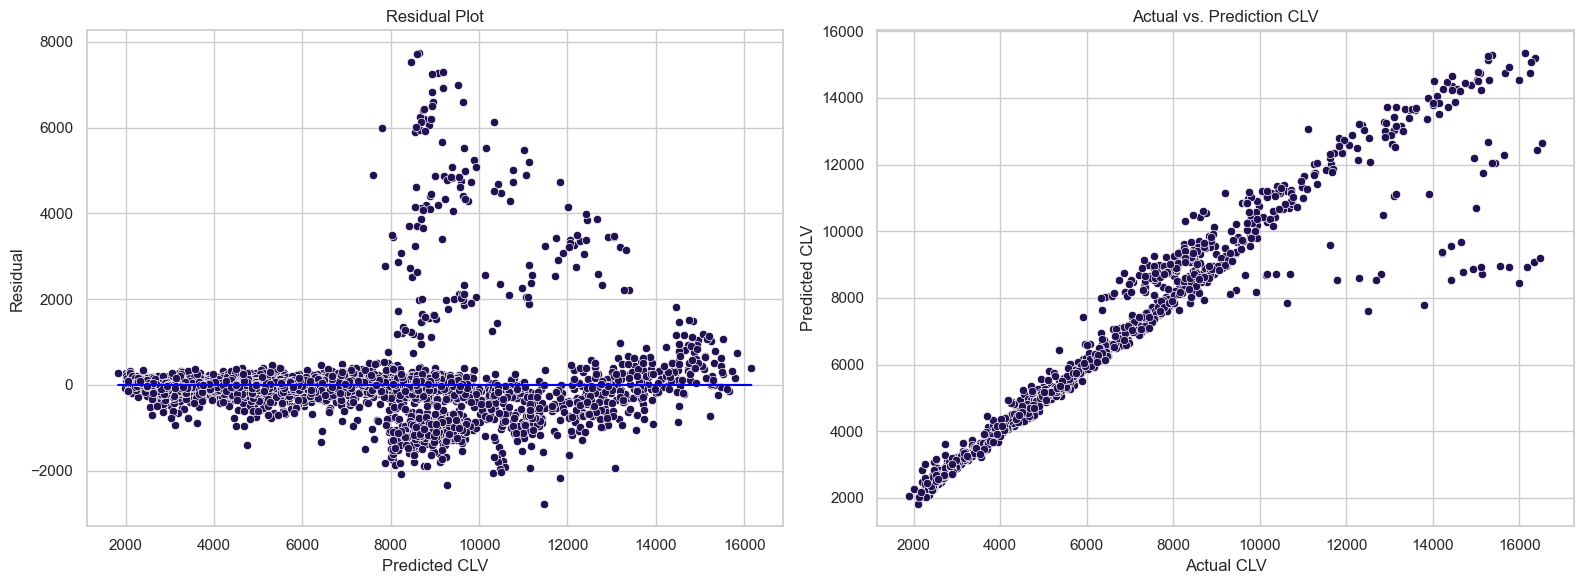

In [136]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='yPred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='yPred', y=0, color='blue')

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_gbr_tuning).set(title='Actual vs. Prediction CLV', xlabel='Actual CLV', ylabel='Predicted CLV')
plt.tight_layout();

The residual plot above shows that the predictions of this model are quite accurate for predicting CLV < 8000 because there are many error values that are close to 0. Above 8000 shows that the variance of the residuals is not uniform (there are values that are overpredicted (error reaches 2000) and underpredicted (error reaches 7000)). In the Actual vs Predicted CLV plot, the prediction results also show quite accurate results because the plot forms a straight line with several outliers starting from the range 
± 9000.

### Feature Importance

To find out which features affect the target prediction (CLV), we can check it through the feature_importances_ function.

In [152]:
# Mengambil nama features dari onehot encoder
f_onehot = col_transform.named_transformers_['onehot'].get_feature_names_out()

# Mengambil nama features dari ordinal encoder
f_ordinal = col_transform.transformers[1][1].cols

# Mengambil nama feature yang ter-passthrough dari ColumnTransformer
f_remain = X_train.iloc[:, col_transform.transformers_[2][2]].columns

# Menggabungkan nama-nama feature
all_feat = list(f_onehot) + list(f_ordinal) + list(f_remain)

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : all_feat,
    'imp' : gbr_tuning['algo'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
16,Number of Policies,0.665885
17,Monthly Premium Auto,0.266681
2,Vehicle Class_SUV,0.015307
18,Total Claim Amount,0.014652
19,Income,0.010517
14,Coverage,0.009203
0,Vehicle Class_Luxury Car,0.004362
1,Vehicle Class_Luxury SUV,0.004328
8,EmploymentStatus_Unemployed,0.001748
15,Education,0.001435


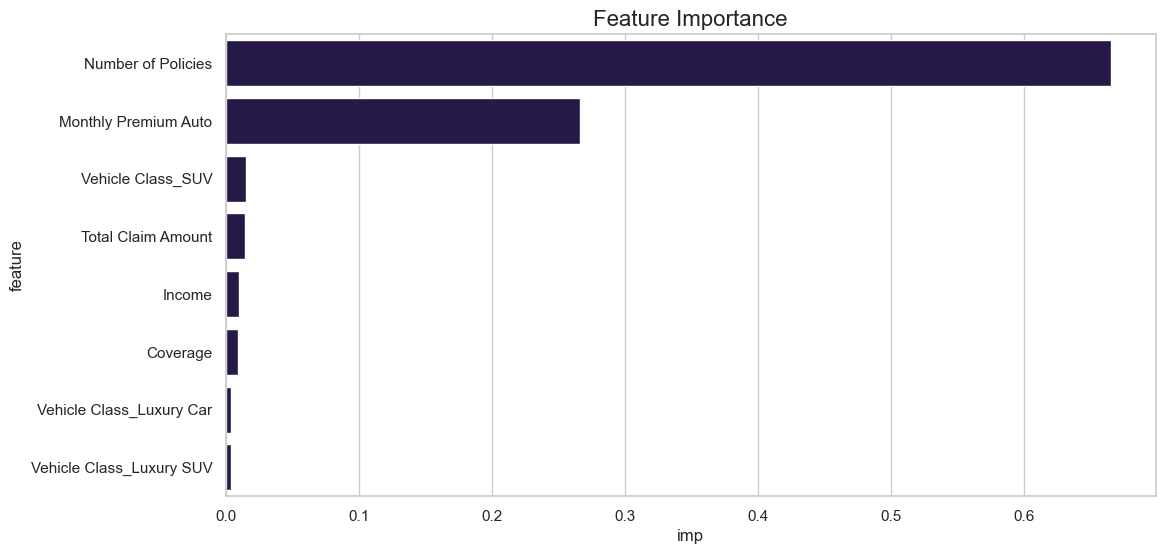

In [153]:
# Bar feature importance
plt.figure(figsize=(12,6))

# Create a bar plot using seaborn
sns.barplot(data=feature_imp.head(8), x='imp', y='feature')

# Add title to the plot
plt.title('Feature Importance', size=16)

# Show the plot
plt.show()

## Conclusion

In this modeling effort, we identified that the `Number of Policies` and `Monthly Premium Auto` features have the most significant impact on predicting `Customer Lifetime Value` (CLV). This aligns with our initial assumption, as both features showed the strongest positive correlation with CLV.

Evaluating our model using metrics like RMSE, MAE, and MAPE, we find that the tuned model's MAE value is approximately 373.974. In simpler terms, if the model predicts the CLV for an insurance customer, it could deviate by around $373.974 from the actual CLV. Alternatively, looking at the MAPE value, the prediction might deviate by approximately 4.8% from the actual CLV.

It's essential to note that these predictions could have larger errors due to non-uniform variance observed in the residual plot, especially for CLV estimates above $8000. This bias might result from a lack of diverse features and data in the dataset to better represent CLV values.

**Model Limitations**

It's crucial to acknowledge the limitations of this model in predicting CLV. If deployed and faced with data beyond its set limitations, the accuracy of the model might diminish. The model's constraints are as follows:
- Maximum monthly auto insurance premium (`Monthly Premium Auto`) = $224.42
- Maximum total claim amount (`Total Claim Amount`) = $1777
- Capable of predicting `Customer Lifetime Value` effectively within the maximum range of 16624.75. Beyond this value, the results may be biased.

## Recommedations

**For Machine Learning Modeling**

1. Investigate predictions with high errors, whether it's overprediction or underprediction. Explore further to identify which features contribute to these errors.
2. If possible, add features related to CLV predictions, such as the duration of being a car insurance customer, the classification of insurance coverage (e.g., Basic I, Basic II, Basic III, etc.), geographical location, and more.
3. Augment customer data to enhance the machine learning model's ability to predict CLV more accurately.
4. Utilize the established model for further development, exploring the use of unsupervised learning (clustering) to segment customers into profitable and unprofitable categories. This can lead to improved marketing strategy decisions.

**For Business**

1. Considering that `Number of Policies` and `Monthly Premium Auto` are the most influential features in predicting CLV, it is recommended to create personalized offers for customers based on the number of policies and premium amounts paid. Personalized offers can be advantageous, as the marketing budget is tailored, avoiding overspending on low-value customers and losing high-value customers.

2. With knowledge of CLV predictions from machine learning, the company is advised to engage in upselling and cross-selling strategies. These strategies present opportunities for additional policy purchases and premium payments, potentially increasing customer CLV.

3. Explore customer segmentation based on the insights gained from the model. Tailor marketing strategies for different customer segments to maximize effectiveness.

4. Continuously monitor and update the model as new data becomes available. This ensures that the model remains accurate and relevant in predicting CLV.

5. Consider incorporating additional features, such as customer loyalty programs or targeted promotions, to enhance customer engagement and retention.

6. Investigate customer satisfaction levels and feedback to identify areas for improvement in service quality and customer experience, contributing to long-term customer loyalty.

7. Leverage the model's predictions to optimize resource allocation in marketing campaigns. Focus efforts on segments with higher predicted CLV to maximize return on investment.

8. Collaborate with data analytics teams to explore more advanced machine learning techniques and refine the model further, ensuring continuous improvement in CLV predictions.

9. Implement data-driven decision-making processes in various aspects of the business, fostering a culture of analytics and innovation.

---

**Future Work for This Project**

1. **Advanced Feature Engineering:** Explore advanced feature engineering techniques for nuanced customer behavior patterns.

2. **Time-Series Analysis:** Incorporate temporal dynamics using time-series models or recurrent neural networks.

3. **Customer Segmentation:** Refine segmentation with clustering algorithms for tailored marketing.

4. **Dynamic Model Updating:** Implement regular model updates to adapt to evolving customer behavior.

5. **Personalization Strategies:** Enhance real-time personalization based on individual preferences and behaviors.

6. **A/B Testing:** Conduct A/B testing to assess the impact of different marketing strategies on CLV.

7. **Integration with CRM:** Integrate CLV predictions with CRM systems for informed customer interactions.

8. **Ethical Considerations:** Address ethical considerations related to data privacy, fairness, and transparency.

9. **Benchmarking:** Compare model performance with industry benchmarks for competitiveness.

10. **Expand Data Sources:** Explore additional data sources, like social media, to enrich the dataset.

11. **Customer Retention Strategies:** Implement targeted retention strategies based on CLV predictions.

12. **Exploratory Data Analysis (EDA):** Conduct EDA to uncover hidden patterns or anomalies in the data.

These initiatives aim to optimize CLV predictions and enhance strategic decision-making for sustainable business growth.

# Sources and Credits

## Datasets:

1. **Customer Lifetime Value Dataset:**
   - Source: https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/
   - Description: Dataset contains information related to customer interactions and transactions analyzed by IBM Wilson Marketing. It likely includes data on customer demographics, purchase history, and engagement metrics. The dataset aims to provide insights into customer behaviors, allowing businesses to assess the long-term value of their customers. Variables may include customer identifiers, purchase frequency, monetary value, and other relevant metrics. Analysts can use this dataset to implement strategies that enhance customer relationships, improve retention, and drive sustainable business growth.

## Libraries:

2. **scikit-learn Library:**
   - Documentation: Scikit-learn: Machine Learning in Python
   - Citation: Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

3. **pandas Library:**
   - Documentation: Data Structures for Statistical Computing in Python
   - Citation: McKinney, W. (2010). Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference (pp. 51-56).

## Research Papers:

4. **Research Paper:**
   - Title: MSE vs RMSE vs MAE vs MAPE vs R-Squared: When to Use?
   - Authors: Ajitesh Kumar
   - Link: https://vitalflux.com/mse-vs-rmse-vs-mae-vs-mape-vs-r-squared-when-to-use/

5. **Research Paper:**
   - Title: Customer Lifetime Value: A Review
   - Authors: Wen Chang, Chen Chang, Qianpin Li
   - Link: https://www.researchgate.net/publication/262944286_Customer_Lifetime_Value_A_Review

## Educational Resources:

6. **Blog Post on Topic:**
   - Title: Predict Customer Lifetime Value using Probabilistic Model
   - Author: Uğur Savcı
   - Link: https://medium.com/@ugursavci/customer-lifetime-value-prediction-in-python-89e4a50df12e

   - Title II: Customer Lifetime Value Prediction with PyMC-Marketing
   - Author II: Hajime Takeda
   - Link II: https://towardsdatascience.com/pymc-marketing-the-key-to-advanced-clv-customer-lifetime-value-forecasting-bc0730973c0a

## GitHub Repositories:

7. **Useful Repository for Data Preprocessing:**
   - Repository: https://github.com/jalajthanaki/Customer_lifetime_value_analysis/blob/master/CLV_analysis_online_retail.ipynb
   - Author: Jalaj Thanaki

## Stack Overflow:

8. **Solution for Specific Problem on Stack Overflow:**
   - Question Title: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
   - Answer: https://stackoverflow.com/questions/34952651/only-integers-slices-ellipsis-numpy-newaxis-none-and-intege

**Save Model**

In [ ]:
# import pickle

# gbr_tuning = grid_gbr.best_estimator_
# gbr_tuning

# Fit
# gbr_tuning.fit(X, y)

# Save with Pickle
# pickle.dump(gbr_tuning, open('model_gradientboost_CLV.sav', 'wb'))

In [ ]:
# Load model
# file_model = 'model_gradientboost_CLV.sav'
# model_loaded = pickle.load(open(file_model, 'rb'))